# <font color='Navy'> <center> Surprise Housing </center> </font>

In [1]:
# import pandas, pd is an alias
import pandas as pd

# import numpy, np is an alias
import numpy as np

# import matplotlib.pyplot, plt is an alias
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

#Modeling 

import statsmodels.api as sm
from sklearn import metrics

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import RFE

from statsmodels.stats.outliers_influence import variance_inflation_factor

#hide Warning
import warnings
warnings.filterwarnings('ignore')

> # <font color=blue> 1. Data Sourcing </font>

> ## 1.1. Enter CSV Data File location

In [2]:
#Store File Location
Location = "./"

#Store Data File Name / csv File
FileName = "train.csv"

LocationLead = Location + FileName
print("File '{0}'' available in Location '{1}' will be used as DataSet".format(FileName,LocationLead))


File 'train.csv'' available in Location './train.csv' will be used as DataSet


> ## 1.2. Read CSV DataSet

In [3]:
#Print dataframe properly
pd.options.display.max_colwidth = 255
pd.options.display.max_rows=225

#Read DataSet in CSV File Format and converting select into Null
dfTrain = pd.read_csv(LocationLead, sep=',', encoding='utf-8',na_values=["Select","unknown"])

#Replace all nan value in dataset into null
dfTrain.replace(to_replace = np.nan, value = '')  
dfTrain.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

> ## 1.3. Inspecting the DataFrame

In [4]:
#Return total number of Rows and Columns
dfTrain.shape

(1460, 81)

In [5]:
#Return Column Names
dfTrain.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
#View some basic statistical details of a data frame 
dfTrain.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [7]:
# Check the dataSet model
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

> # <font color=blue> 2. Data Cleaning </font>

> ## 2.1. DataSet Metadata Prepration

> ### Summary
> - There are 1460 Rows and 81 Columns
> - 81 Colums consists of both dimesnion and measures
> - This dataset required missing value treatment


In [8]:
# research each columns in dataframe datatype

print("*" * 115)
print("| Column Name".ljust(16), '|', "Data Type", '|', "Null",'|', "Unique",'|', 
      "Sample Unique Records                                              |")
print("*" * 115)

for cols in dfTrain.columns:
    print('|', cols.ljust(14),'|' ,'%-9s'%(dfTrain[cols].dtypes),'|' , 
          "{:<4d}".format(dfTrain[cols].isnull().sum()),'|', "{:<6d}".format(dfTrain[cols].nunique()),
          '|', dfTrain[cols].unique()[0:5])

*******************************************************************************************************************
| Column Name    | Data Type | Null | Unique | Sample Unique Records                                              |
*******************************************************************************************************************
| Id             | int64     | 0    | 1460   | [1 2 3 4 5]
| MSSubClass     | int64     | 0    | 15     | [ 60  20  70  50 190]
| MSZoning       | object    | 0    | 5      | ['RL' 'RM' 'C (all)' 'FV' 'RH']
| LotFrontage    | float64   | 259  | 110    | [65. 80. 68. 60. 84.]
| LotArea        | int64     | 0    | 1073   | [ 8450  9600 11250  9550 14260]
| Street         | object    | 0    | 2      | ['Pave' 'Grvl']
| Alley          | object    | 1369 | 2      | [nan 'Grvl' 'Pave']
| LotShape       | object    | 0    | 4      | ['Reg' 'IR1' 'IR2' 'IR3']
| LandContour    | object    | 0    | 4      | ['Lvl' 'Bnk' 'Low' 'HLS']
| Utilities      | ob

> ## 2.2. Dropping Duplicate values in dataset

In [9]:
# Dropping duplicate values in dataset, if exist
dfTrain = dfTrain.drop_duplicates()
dfTrain.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

> ## 2.3. Removing identifier field

In [10]:
dfTrain.drop(['Id'], axis=1, inplace=True)

> ## 2.4. Removing column have unique values

In [11]:
colUnique = dfTrain.apply(lambda x: x.nunique())
dfTrainCol = dfTrain.drop(colUnique[colUnique<2].index, axis=1)
dfTrain.shape

(1460, 80)

> ## 2.5. Handling columns with missing values

In [12]:
#replacing columns have null more than to No or Zero 

missValCols = ['Alley', 'PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu', 'GarageCond', 
               'GarageType', 'GarageQual', 'BsmtExposure','BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 
               'BsmtQual', 'MasVnrType', 'Electrical','GarageFinish']

#replacing the columns have null to No
for col in missValCols:
    print(col.ljust(12),':',dfTrain[col].unique())
    dfTrain[col] = dfTrain[col].fillna('No')
    print(col.ljust(12),':',dfTrain[col].unique())

#replacing the column have null to Zero
print('MasVnrArea'.ljust(12),':',dfTrain['MasVnrArea'].unique())
dfTrain['MasVnrArea'] = dfTrain['MasVnrArea'].fillna(0)
print('MasVnrArea'.ljust(12),':',dfTrain['MasVnrArea'].unique())

print(dfTrain.shape)

Alley        : [nan 'Grvl' 'Pave']
Alley        : ['No' 'Grvl' 'Pave']
PoolQC       : [nan 'Ex' 'Fa' 'Gd']
PoolQC       : ['No' 'Ex' 'Fa' 'Gd']
MiscFeature  : [nan 'Shed' 'Gar2' 'Othr' 'TenC']
MiscFeature  : ['No' 'Shed' 'Gar2' 'Othr' 'TenC']
Fence        : [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
Fence        : ['No' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
FireplaceQu  : [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
FireplaceQu  : ['No' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
GarageCond   : ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
GarageCond   : ['TA' 'Fa' 'No' 'Gd' 'Po' 'Ex']
GarageType   : ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
GarageType   : ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' 'No' 'Basment' '2Types']
GarageQual   : ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
GarageQual   : ['TA' 'Fa' 'Gd' 'No' 'Ex' 'Po']
BsmtExposure : ['No' 'Gd' 'Mn' 'Av' nan]
BsmtExposure : ['No' 'Gd' 'Mn' 'Av']
BsmtFinType2 : ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
BsmtFinType2 : ['Unf' 'BLQ' 'No' 'ALQ' 'Rec' 'LwQ' 'GLQ']
BsmtFinType1 : ['GLQ' 'AL

In [13]:
dfTrain.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave    No      Reg   
1          20       RL         80.0     9600   Pave    No      Reg   
2          60       RL         68.0    11250   Pave    No      IR1   
3          70       RL         60.0     9550   Pave    No      IR1   
4          60       RL         84.0    14260   Pave    No      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0     No    No          No   
1         Lvl    AllPub       FR2  ...        0     No    No          No   
2         Lvl    AllPub    Inside  ...        0     No    No          No   
3         Lvl    AllPub    Corner  ...        0     No    No          No   
4         Lvl    AllPub       FR2  ...        0     No    No          No   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

> ## 2.6. Treating Missing Column Values

In [14]:
#Percentage of missing values column-wise
round(100*(dfTrain.isnull().sum(axis=0)/len(dfTrain.index)),2).sort_values(ascending=False)

LotFrontage      17.74
GarageYrBlt       5.55
SalePrice         0.00
Foundation        0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.00
MasVnrArea        0.00
ExterQual         0.00
ExterCond         0.00
BsmtQual          0.00
BsmtCond          0.00
BsmtExposure      0.00
BsmtFinType1      0.00
BsmtFinSF1        0.00
BsmtFinType2      0.00
BsmtFinSF2        0.00
BsmtUnfSF         0.00
RoofStyle         0.00
YearRemodAdd      0.00
Heating           0.00
LotConfig         0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Alley             0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LandSlope         0.00
YearBuilt         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
TotalBsmtSF       0.00
HeatingQC         0.00
SaleCondition     0.00
ScreenPorch       0.00
GarageQual 

> ## Analysing columns have Null values

In [15]:
print(dfTrain['GarageYrBlt'].describe())
print(dfTrain['MasVnrArea'].describe())

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64
count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64


> ## 2.7 Treating Missing Values in Rows

In [16]:
# Dropping rows for the NaN values since we will still have sufficient data for analysis
dfTrain.dropna(axis='rows', inplace=True)

# Checking for percentage of missing values per column
(((dfTrain.isnull().sum()/dfTrain.shape[0])*100).round(2))

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath 

In [17]:
dfTrain.shape

(1127, 80)

> ## 2.8 Creating Derived Feature

In [18]:
#Converting dates (YearBuilt, YearRemodAdd, GarageYrBlt) to days

dfTrain['DiffYearBuilt'] = pd.datetime.now().year - dfTrain['YearBuilt']
dfTrain['DiffYearRemodAdd'] = pd.datetime.now().year - dfTrain['YearRemodAdd']
dfTrain['DiffGarageYrBlt'] = pd.datetime.now().year - dfTrain['GarageYrBlt']


In [19]:
dfTrain.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave    No      Reg   
1          20       RL         80.0     9600   Pave    No      Reg   
2          60       RL         68.0    11250   Pave    No      IR1   
3          70       RL         60.0     9550   Pave    No      IR1   
4          60       RL         84.0    14260   Pave    No      IR1   

  LandContour Utilities LotConfig  ... MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub    Inside  ...          No       0      2   2008   
1         Lvl    AllPub       FR2  ...          No       0      5   2007   
2         Lvl    AllPub    Inside  ...          No       0      9   2008   
3         Lvl    AllPub    Corner  ...          No       0      2   2006   
4         Lvl    AllPub       FR2  ...          No       0     12   2008   

  SaleType SaleCondition  SalePrice  DiffYearBuilt  DiffYearRemodAdd  \
0       WD        Normal     208500             16                16   
1       WD        Normal     181500             43                43   
2       WD        Normal     223500             18                17   
3       WD       Abnorml     140000            104                49   
4       WD        Normal     250000             19                19   

   DiffGarageYrBlt  
0             16.0  
1             43.0  
2             18.0  
3             21.0  
4             19.0  

[5 rows x 83 columns]

> # <font color=blue> 3. Univariate Analysis </font>

> ## 3.1. Ordered Categorical Variables

> ### The below listed columns are Ordered Categorical Variables
>  - LotShape
>  - LandContour
>  - Utilities
>  - LandSlope
>  - BldgType
>  - HouseStyle
>  - ExterQual
>  - ExterCond 
>  - BsmtQual
>  - BsmtCond
>  - BsmtExposure
>  - BsmtFinType1
>  - BsmtFinType2
>  - HeatingQC
>  - KitchenQual
>  - Functional
>  - FireplaceQu
>  - GarageFinish
>  - GarageCars
>  - GarageQual
>  - GarageCond
>  - PavedDrive
>  - PoolQC
>  - Fence


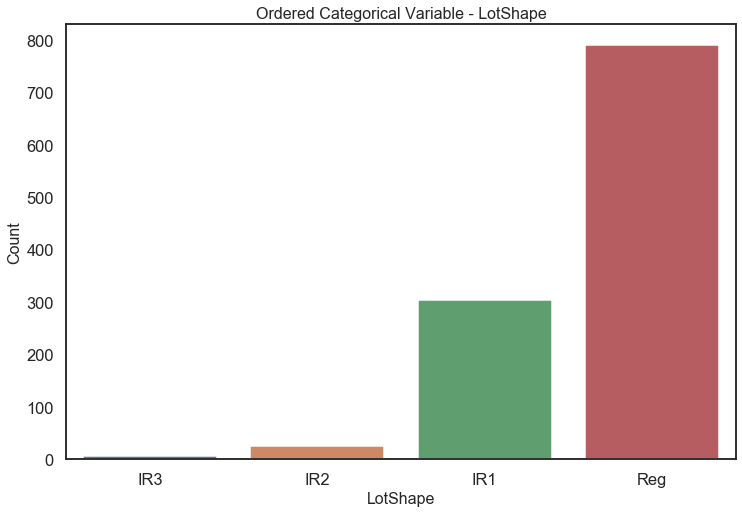

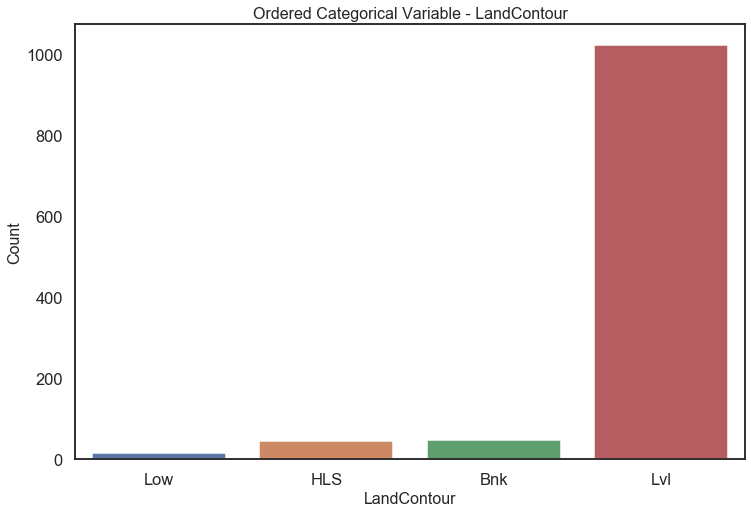

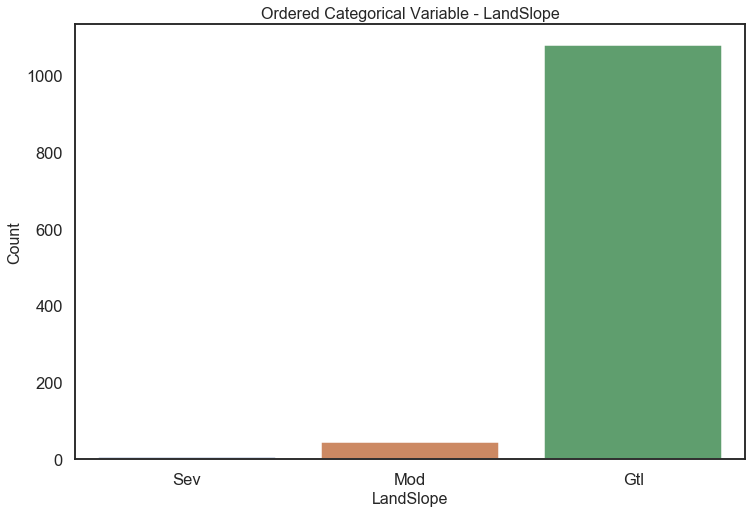

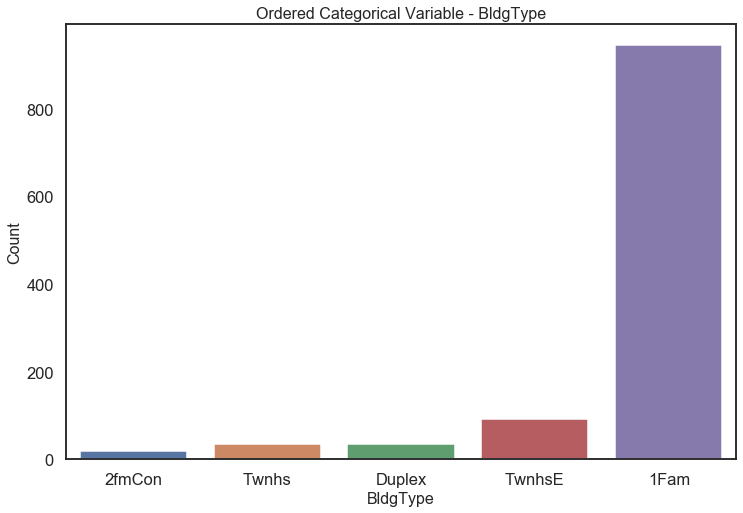

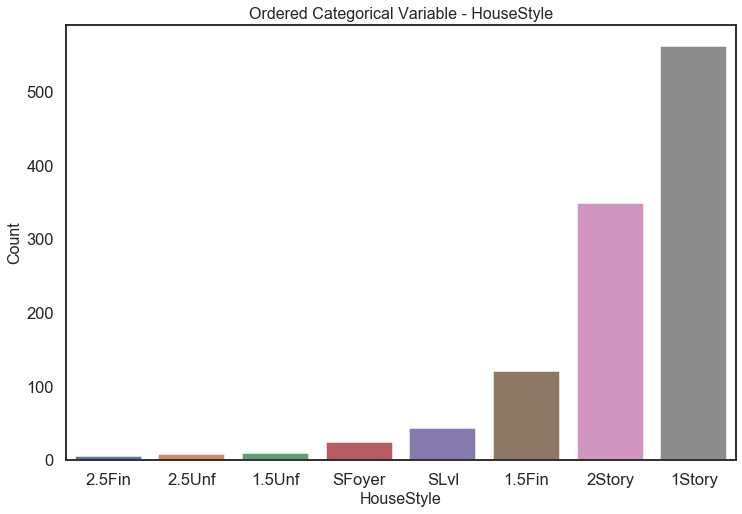

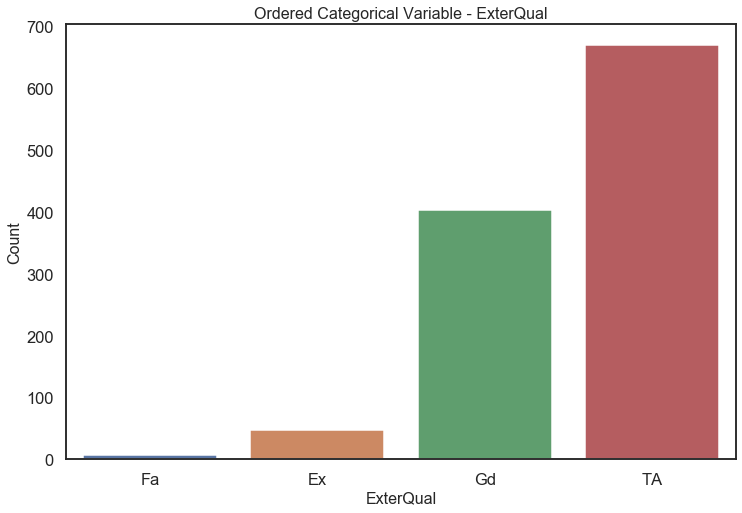

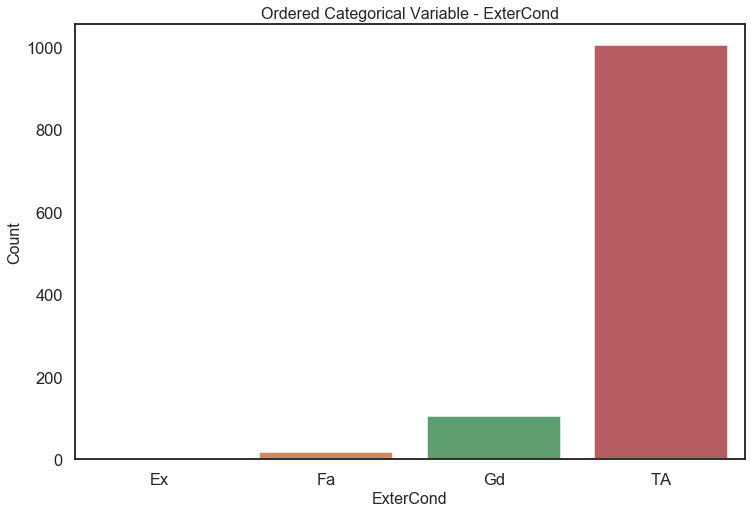

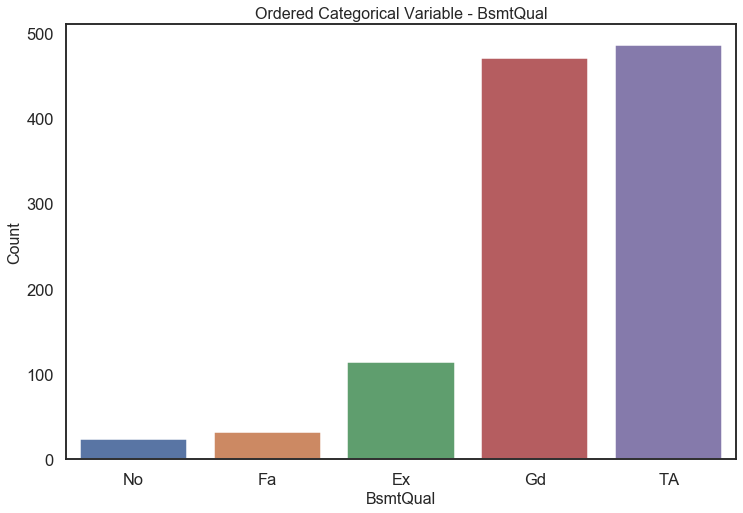

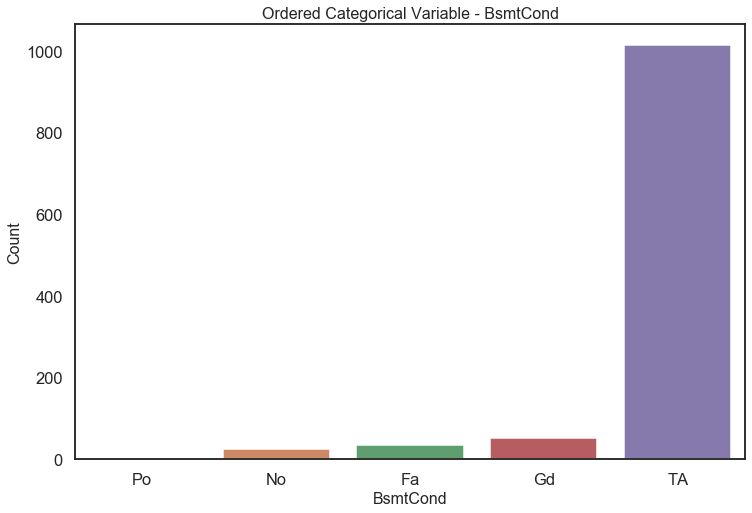

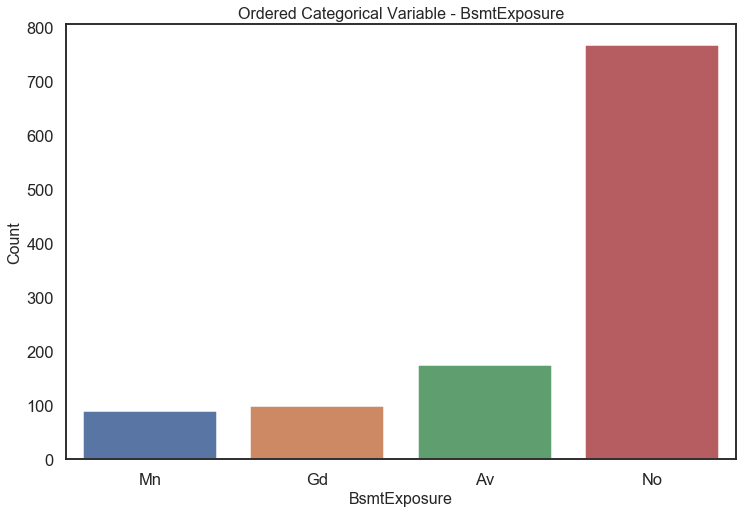

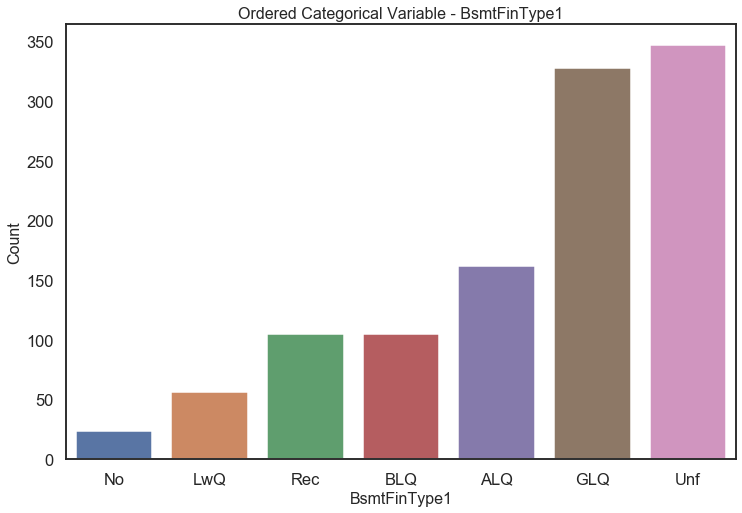

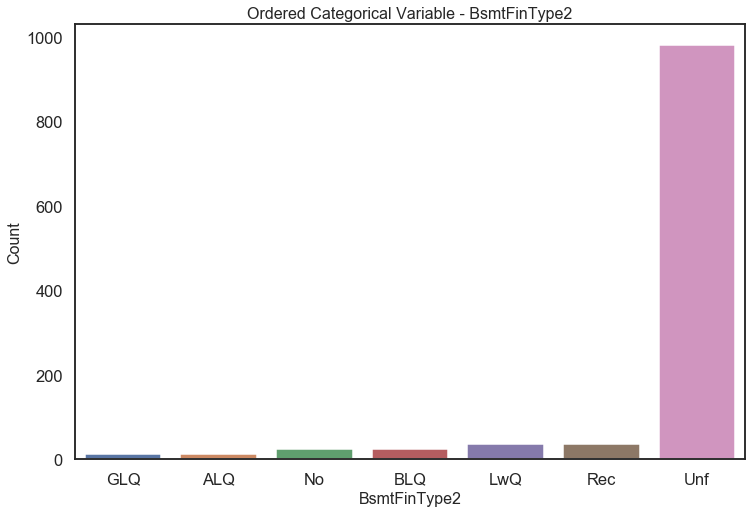

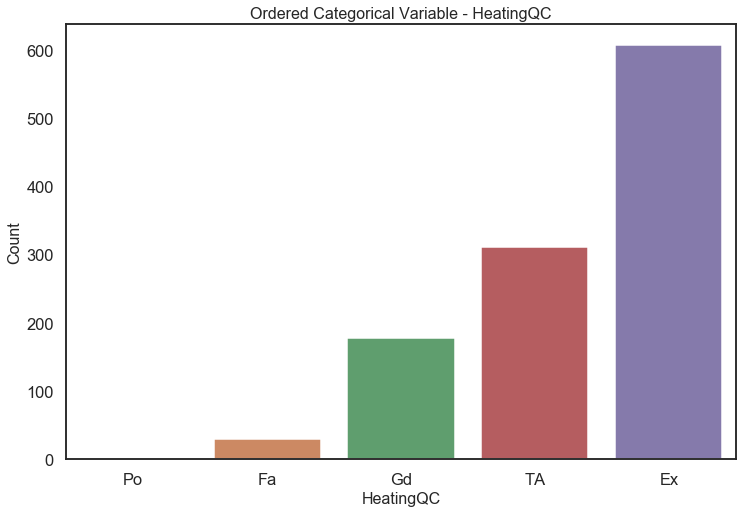

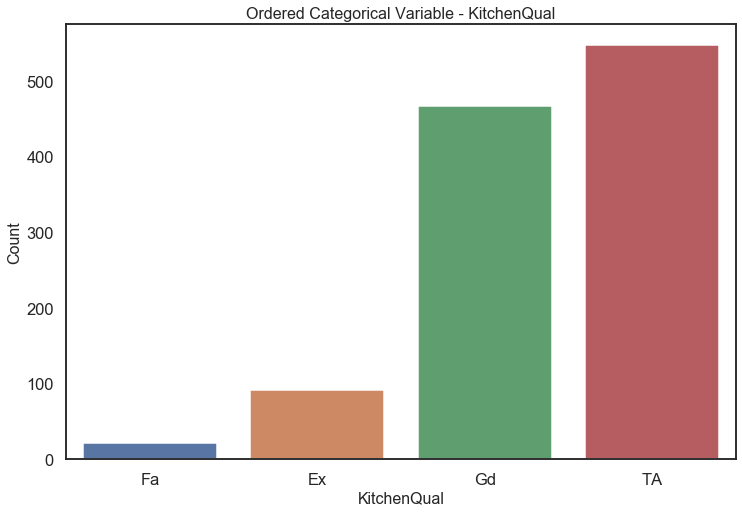

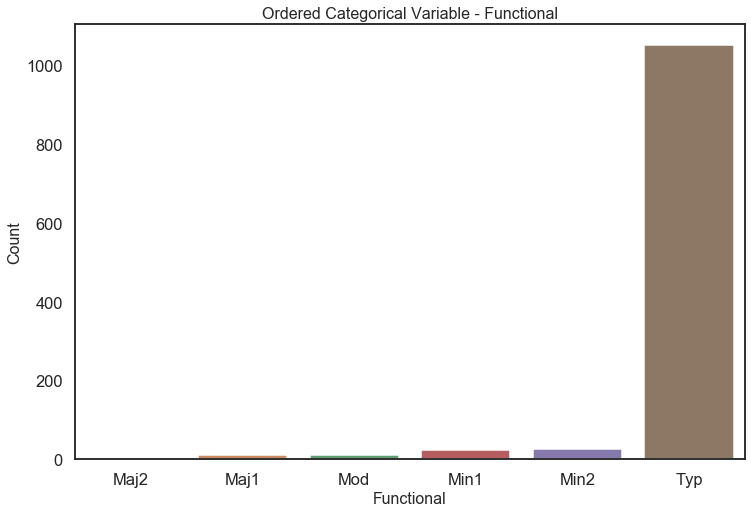

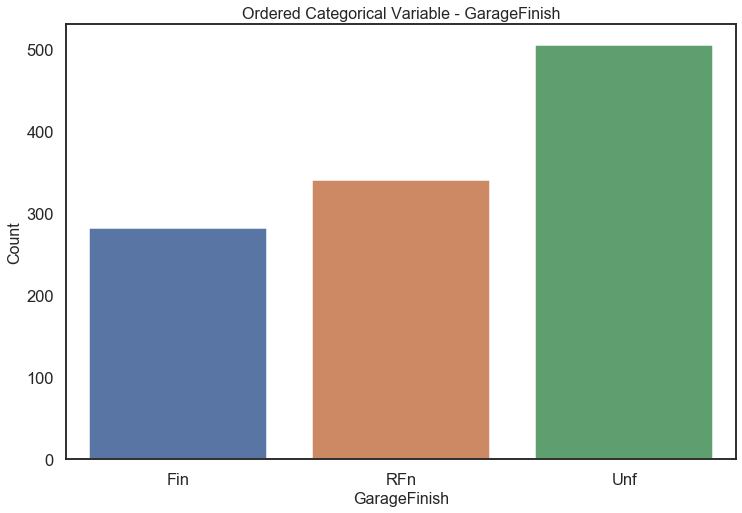

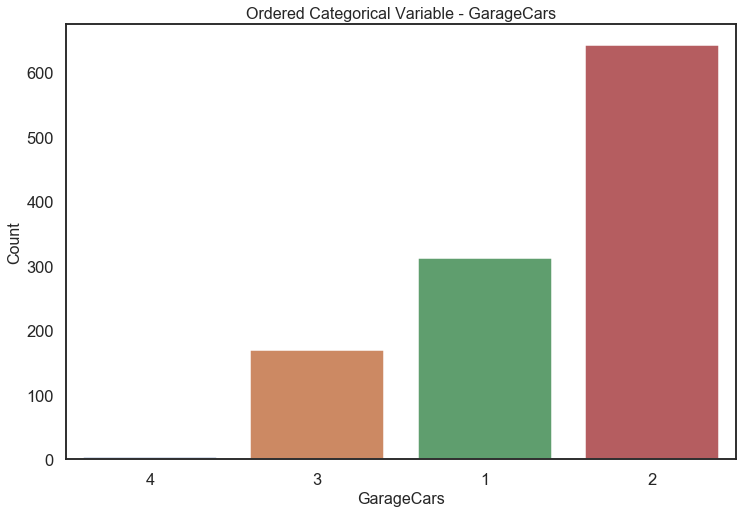

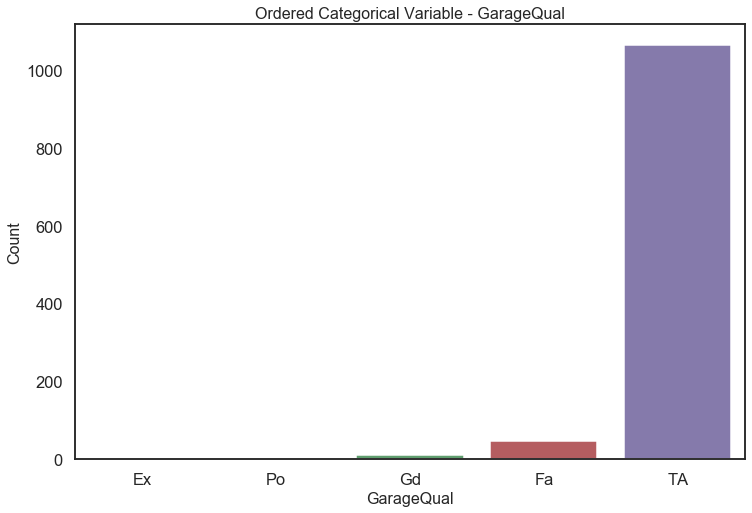

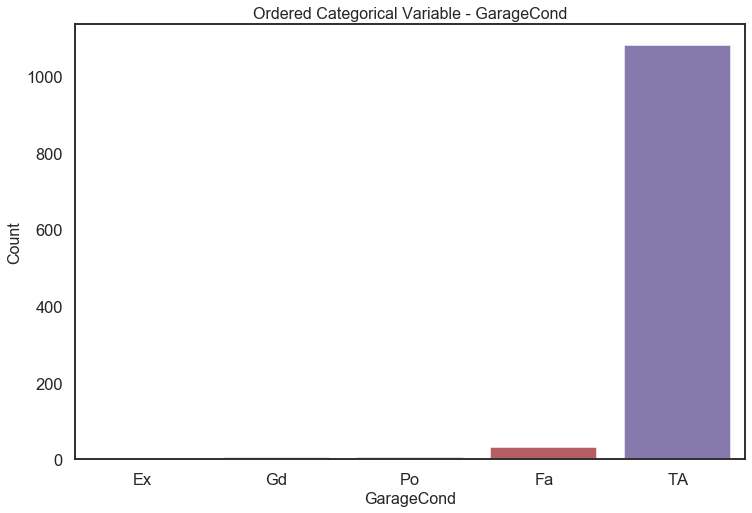

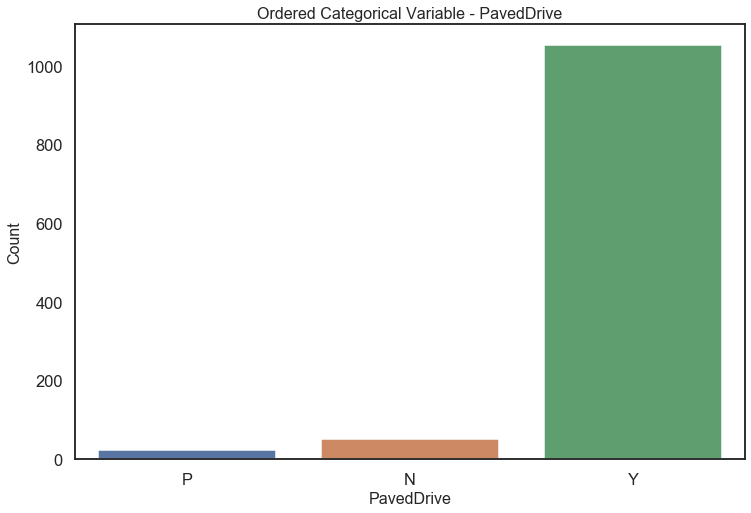

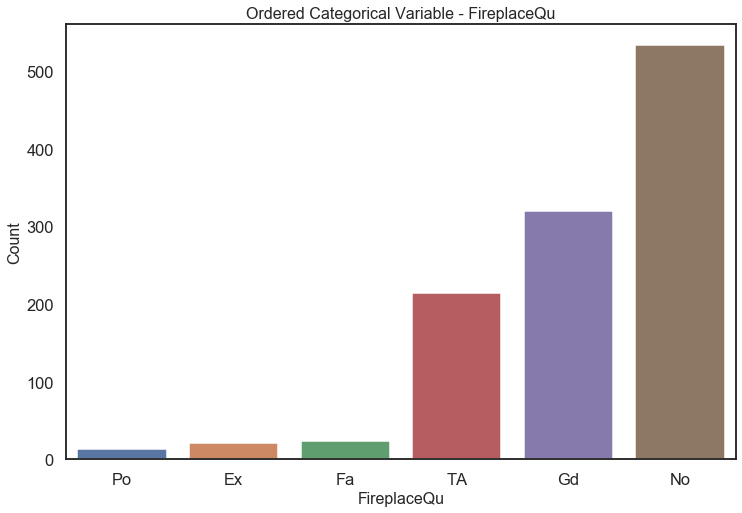

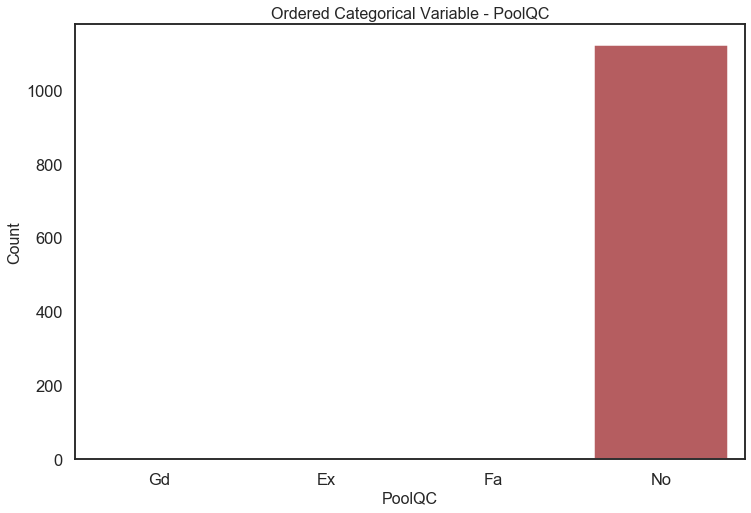

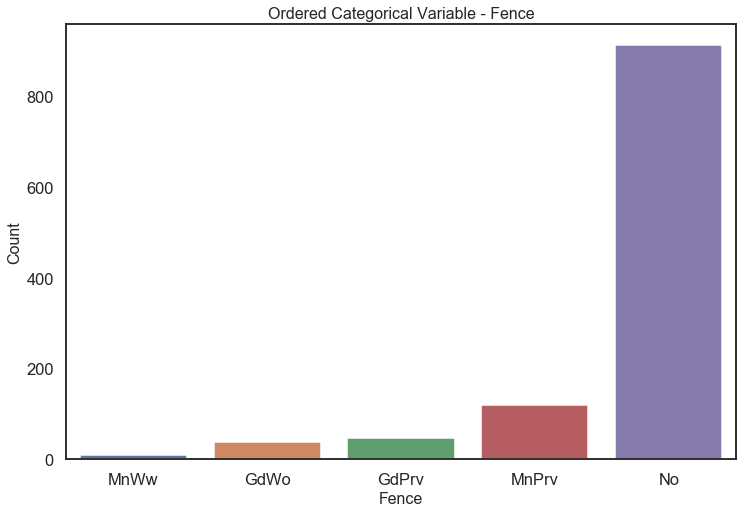

In [20]:
#List of Ordered Variables
orderedCols = ['LotShape', 'LandContour', 'LandSlope', 'BldgType', 'HouseStyle', 'ExterQual', 
               'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 
               'KitchenQual', 'Functional','GarageFinish', 'GarageCars', 'GarageQual', 
               'GarageCond', 'PavedDrive', 'FireplaceQu', 'PoolQC','Fence']

#Bar Plot creation
sns.set(style="white", context="talk")

# Draw a nested barplot to show segemented Var Income and Gender
for col in orderedCols:
    plt.subplots(figsize=(12,8), sharex=True)
    sns.countplot(x=dfTrain[col], data=dfTrain, palette="deep", 
                  order=reversed(dfTrain[col].value_counts().index))
    
    # Providing Label
    plt.xlabel(col, fontsize=16)
    plt.ylabel('Count', fontsize=16)
    plt.title("Ordered Categorical Variable - "+ col, fontsize=16)
    plt.show()


> ### The below listed columns are Ordered Categorical Variables
>  - OverallQual
>  - OverallCond
>  - YearBuilt
>  - YearRemodAdd
>  - BsmtFullBath
>  - BsmtHalfBath
>  - FullBath
>  - HalfBath
>  - Bedroom
>  - Kitchen
>  - TotRmsAbvGrd
>  - Fireplaces
>  - GarageYrBlt
>  - MoSold
>  - YrSold
>  - LotFrontage
>  - LotArea
>  - MasVnrArea
>  - BsmtFinSF1
>  - BsmtFinSF2
>  - BsmtUnfSF
>  - TotalBsmtSF
>  - 1stFlrSF
>  - 2ndFlrSF
>  - LowQualFinSF
>  - GrLivArea
>  - GarageArea
>  - WoodDeckSF
>  - OpenPorchSF
>  - EnclosedPorch
>  - 3SsnPorch
>  - ScreenPorch
>  - PoolArea
>  - MiscVal


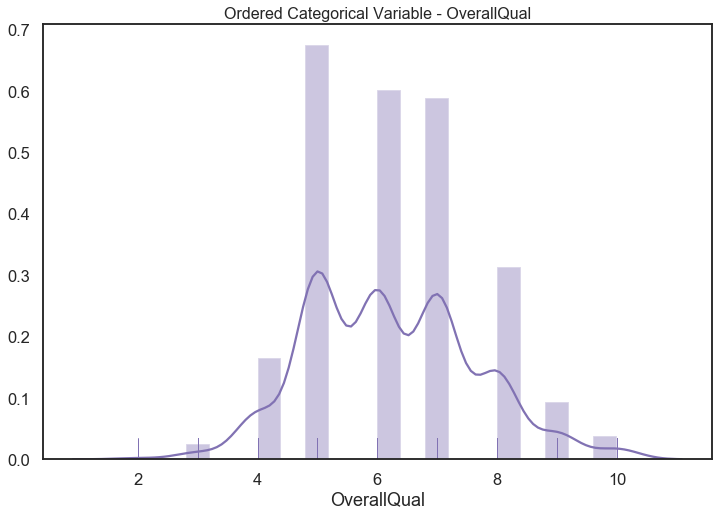

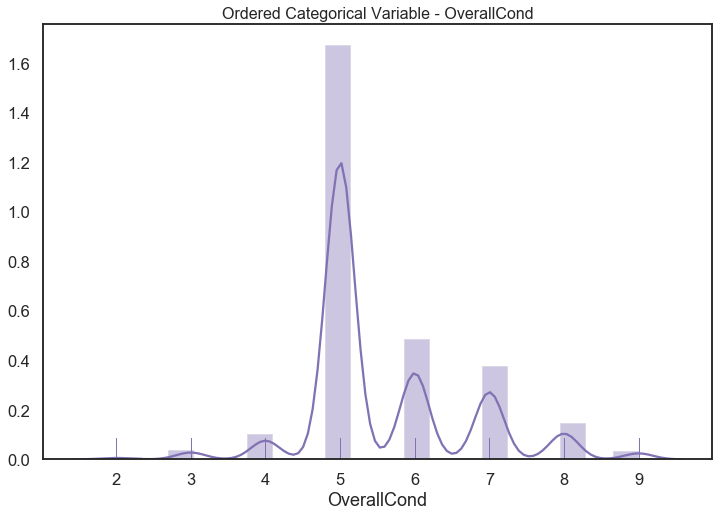

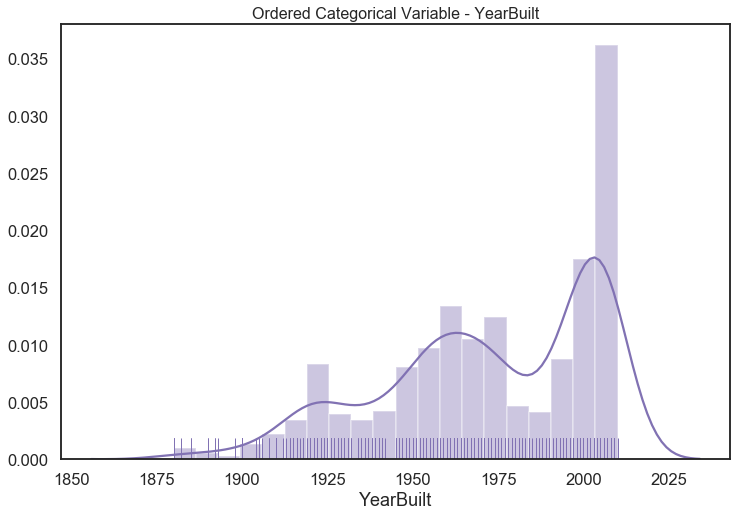

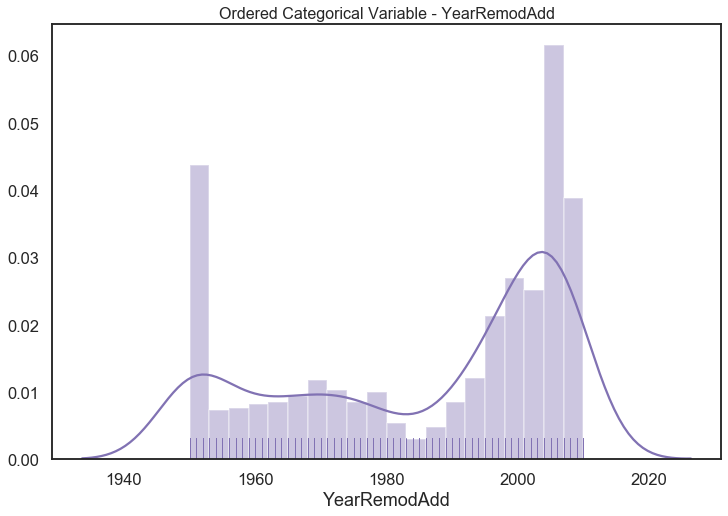

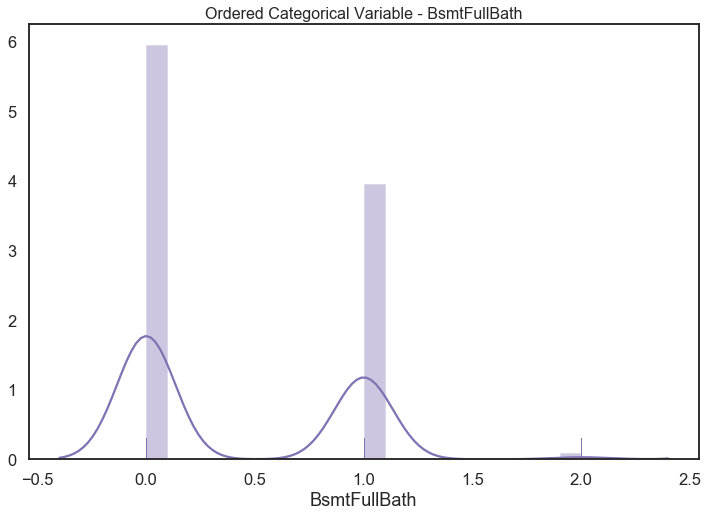

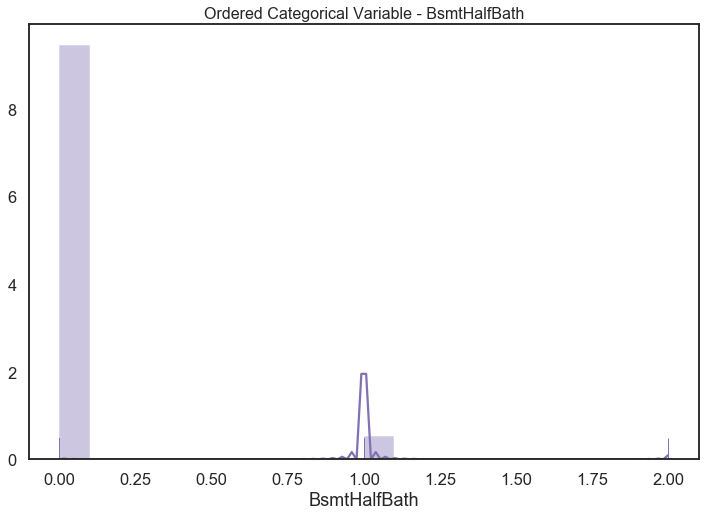

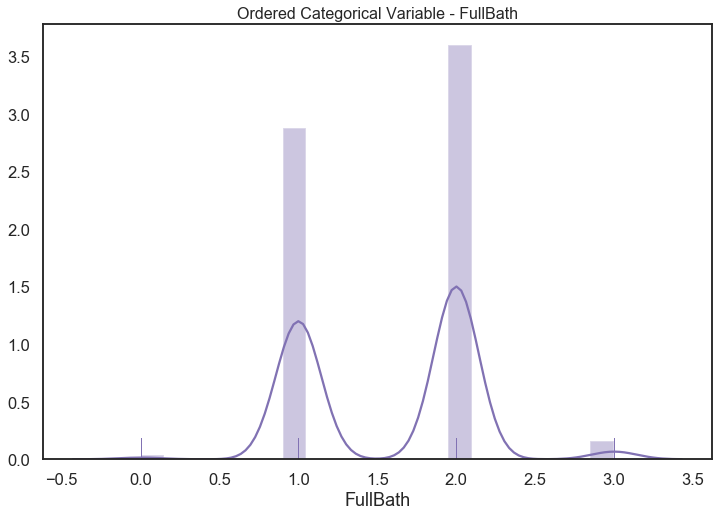

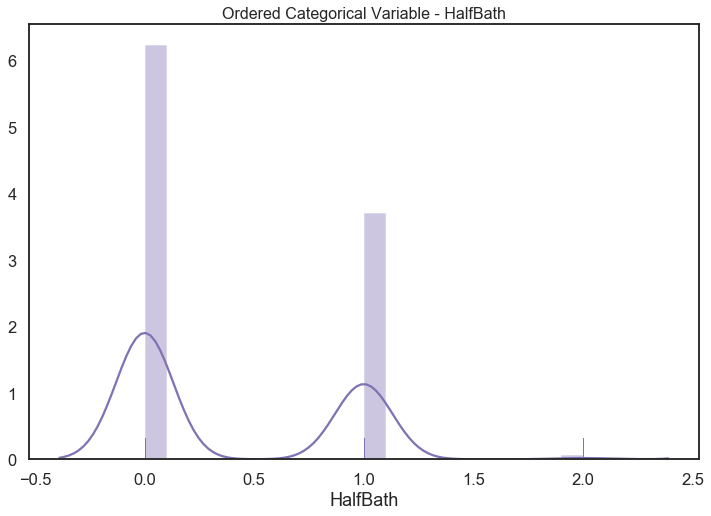

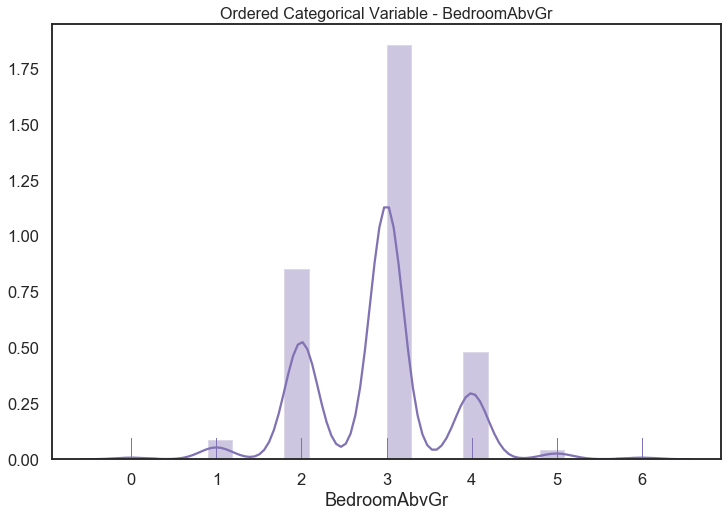

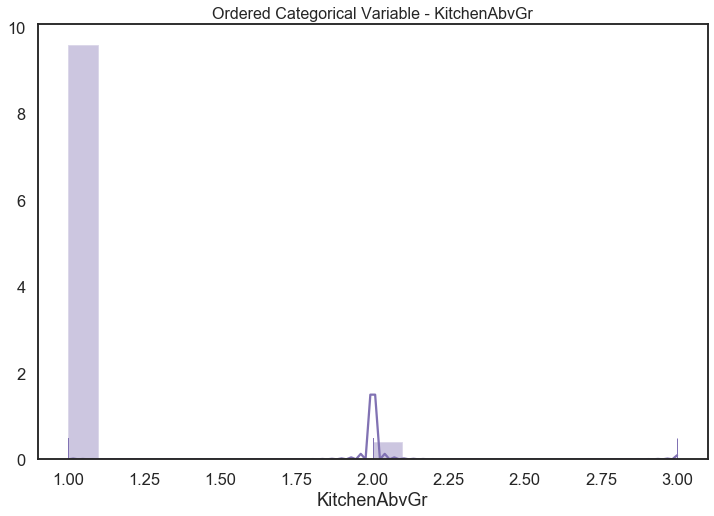

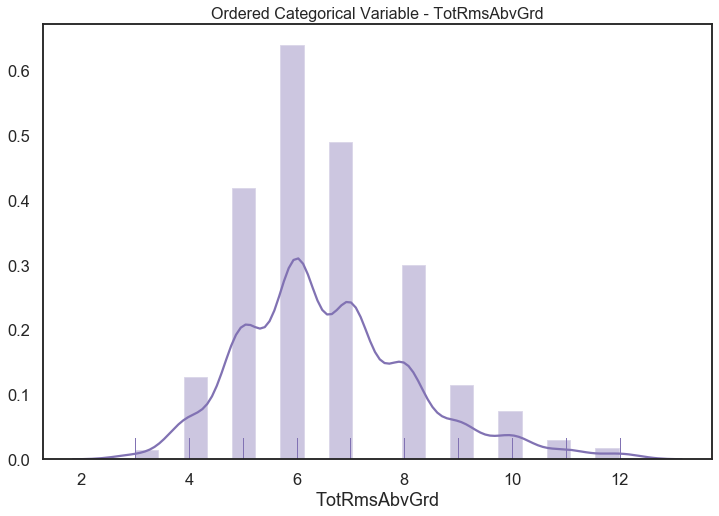

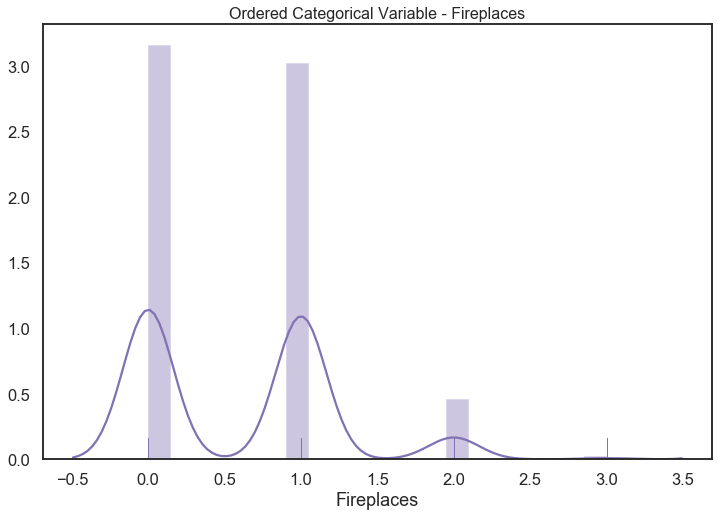

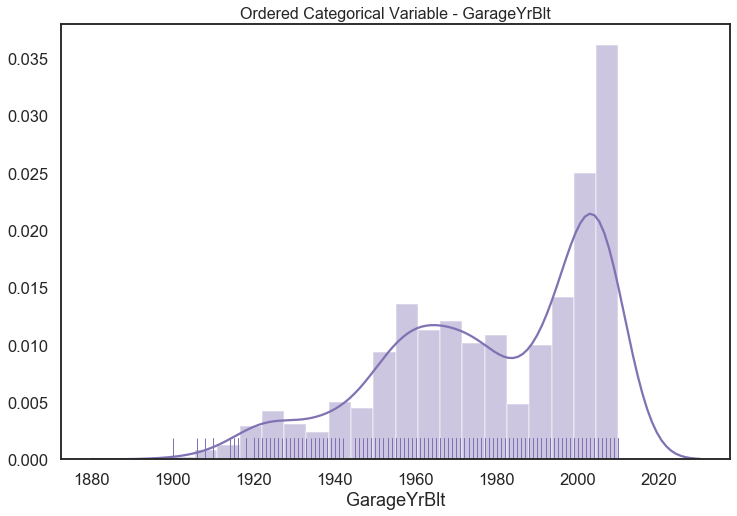

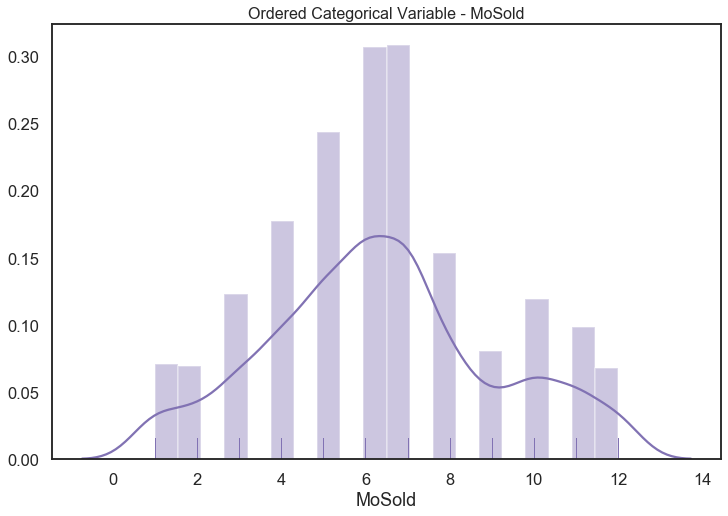

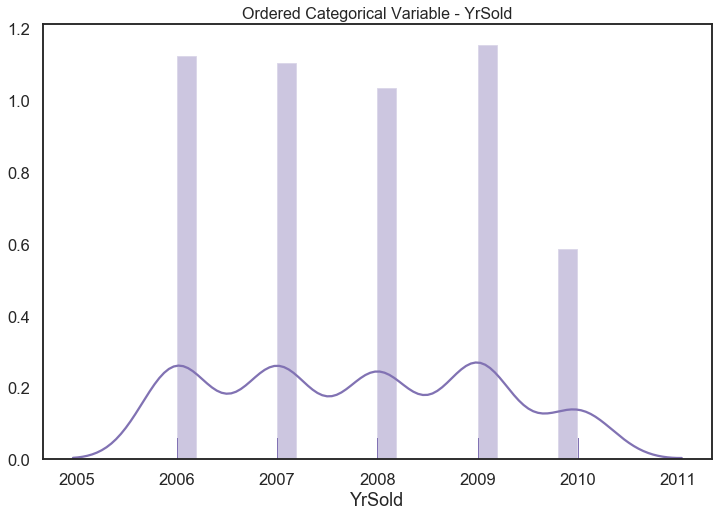

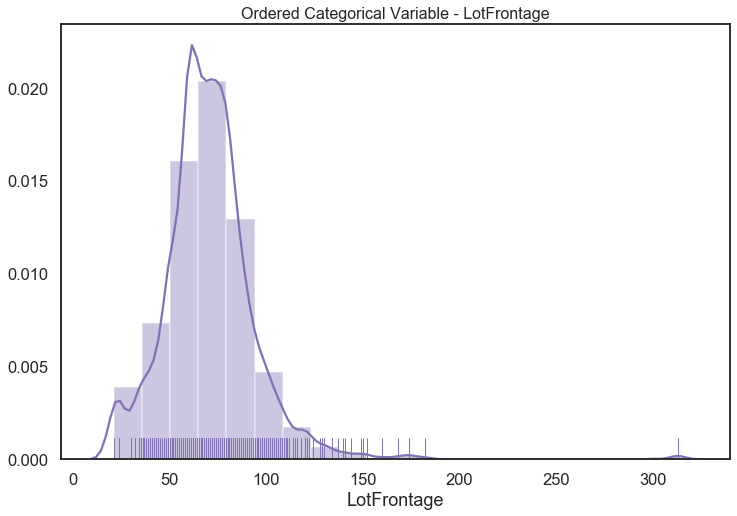

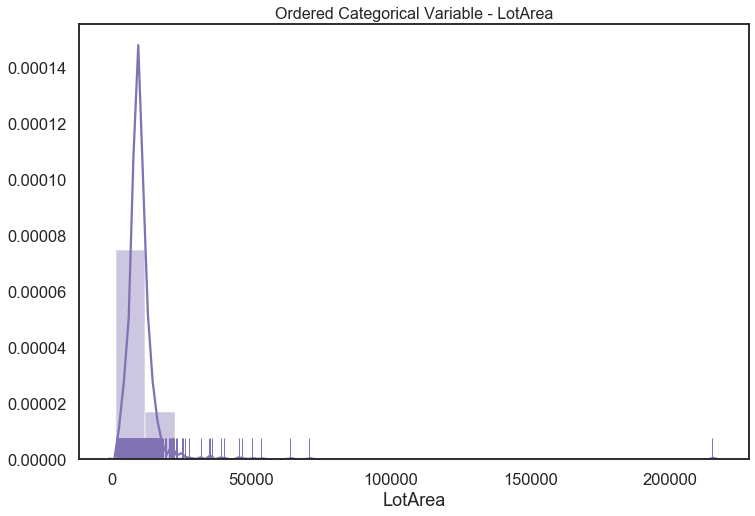

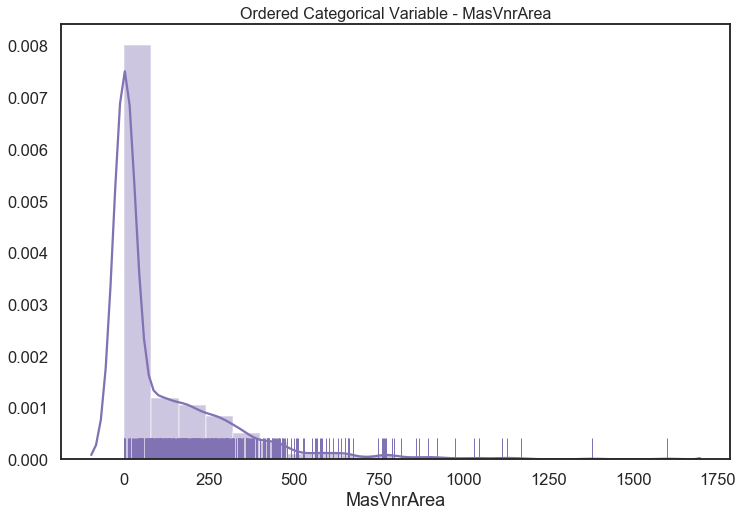

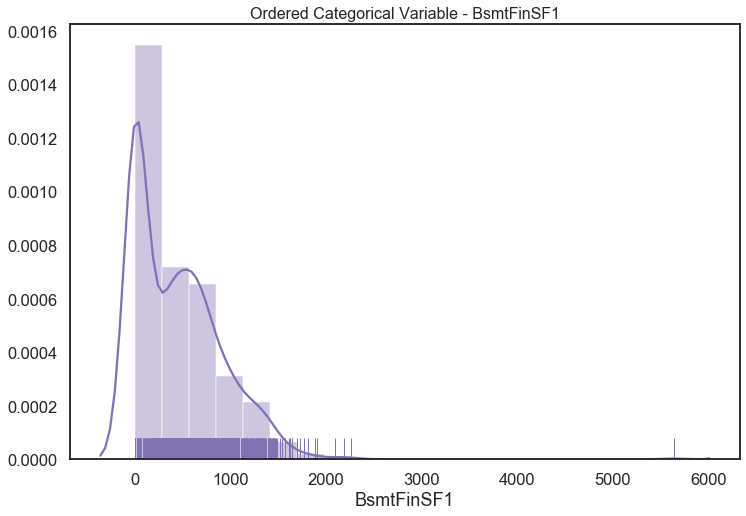

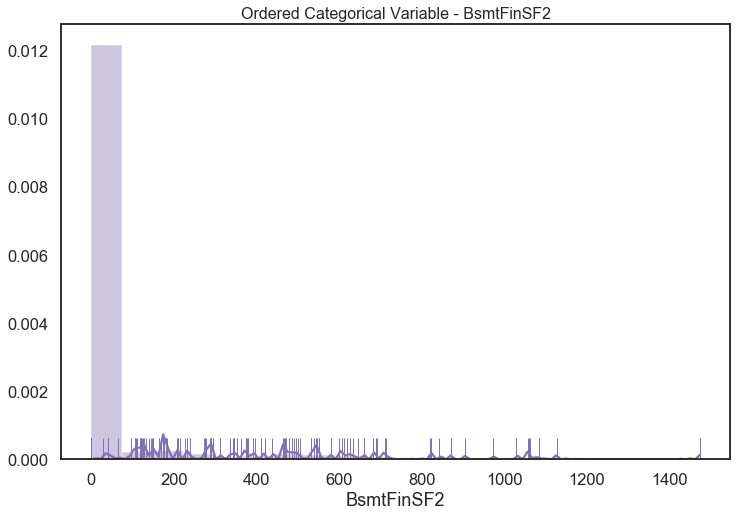

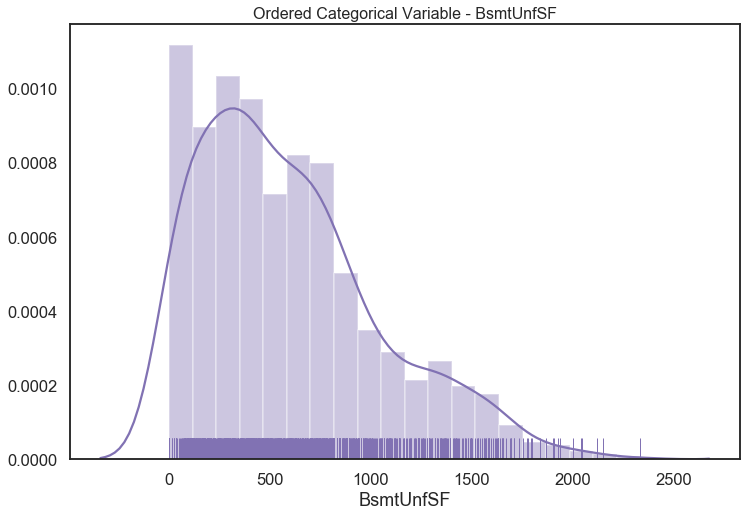

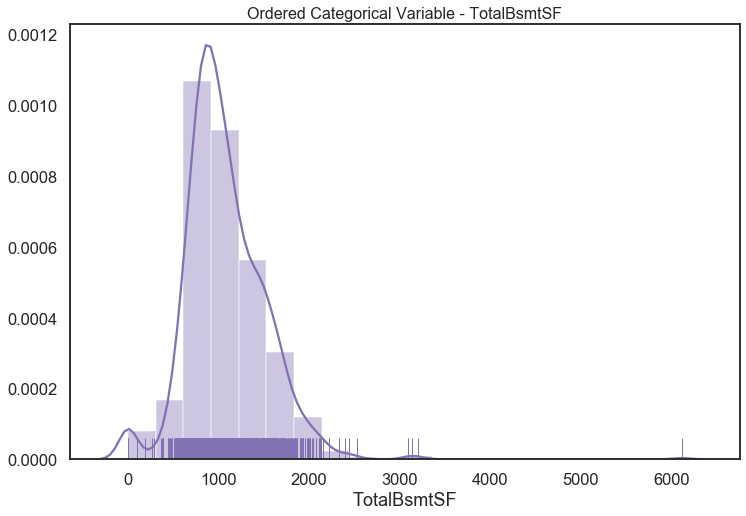

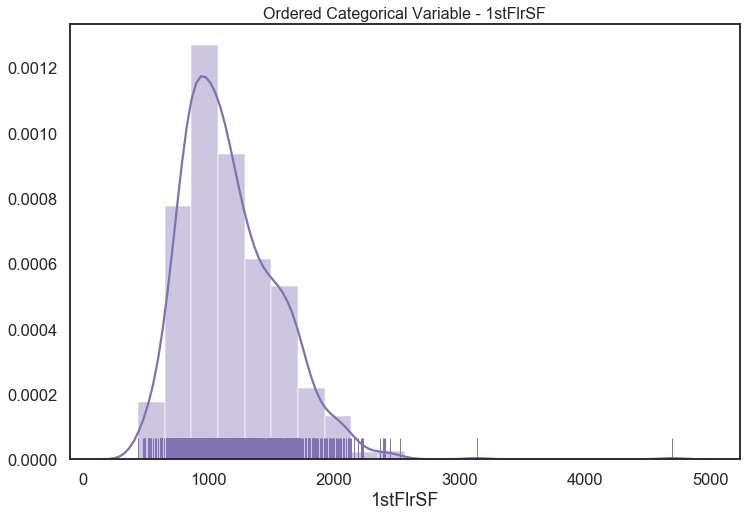

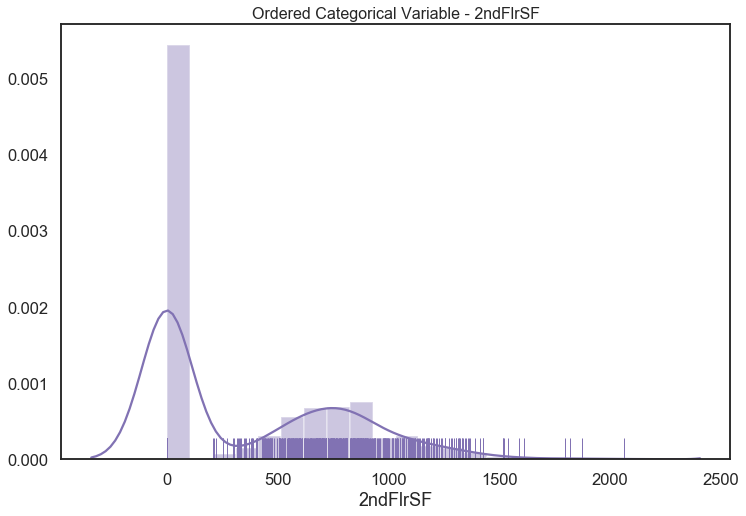

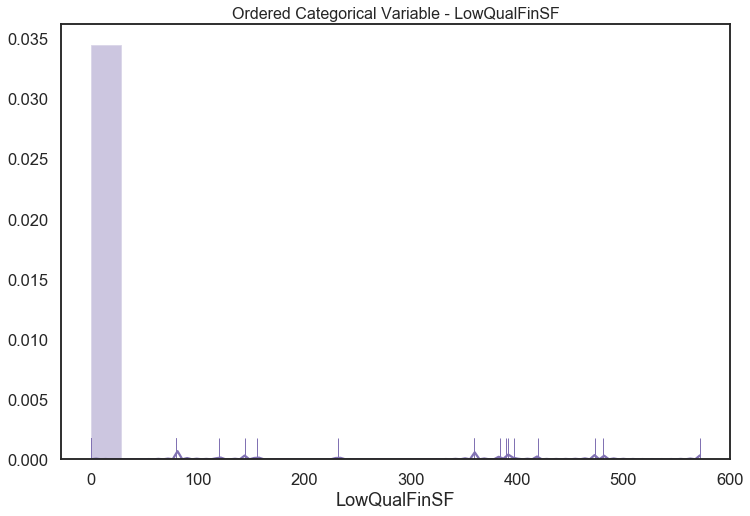

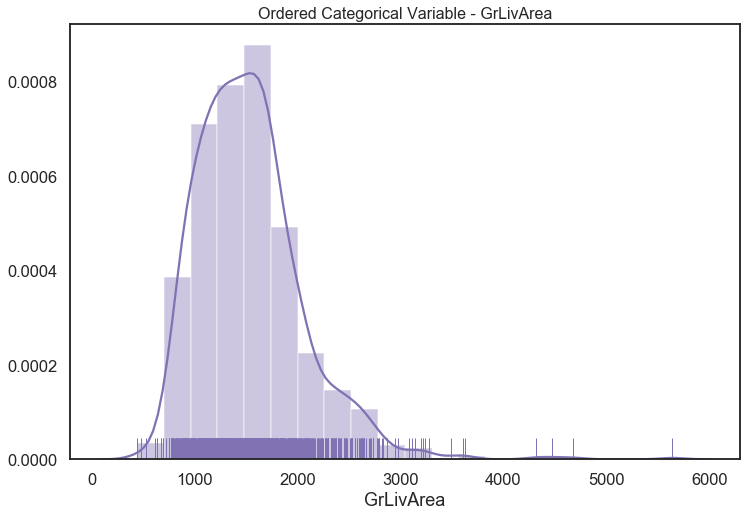

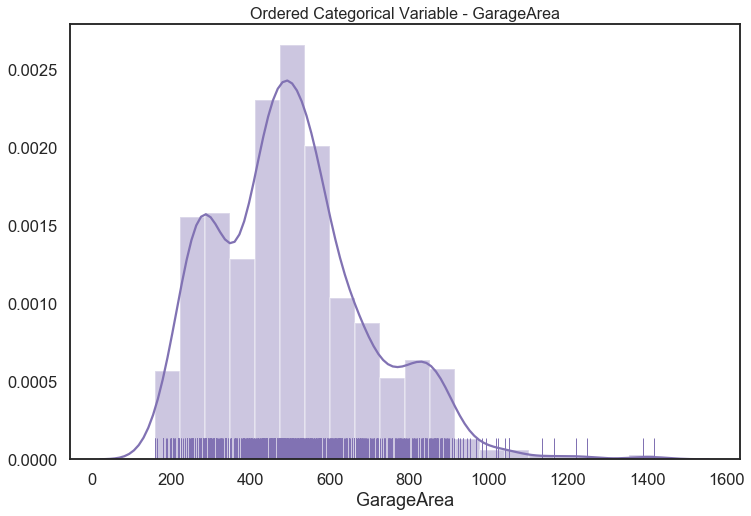

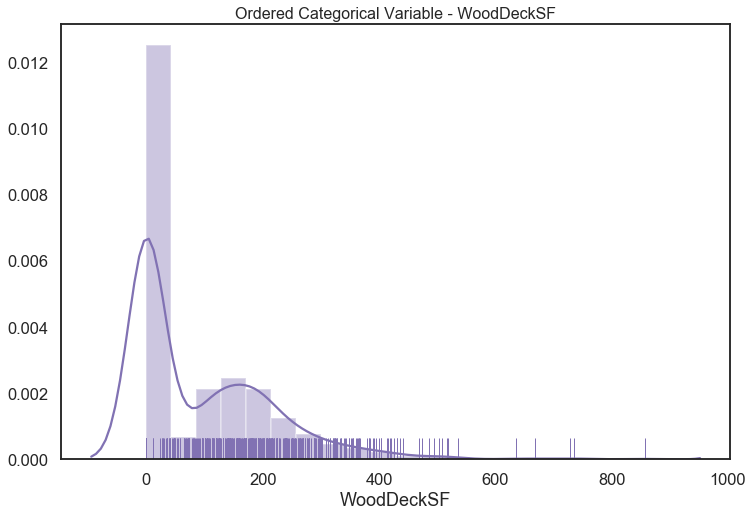

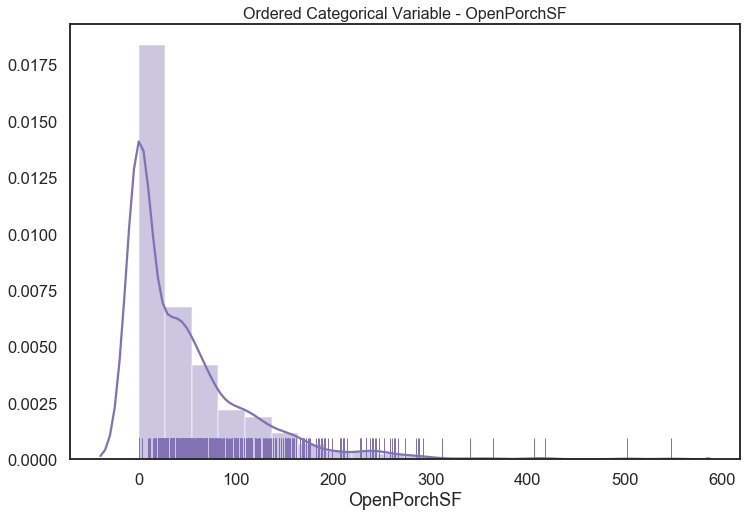

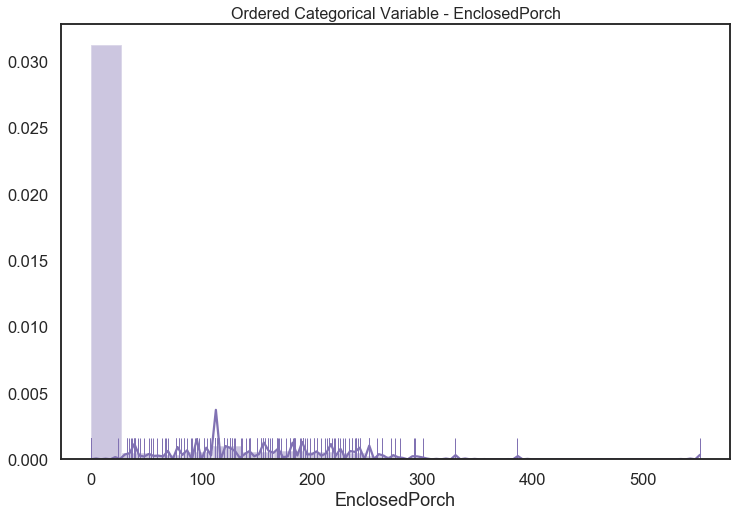

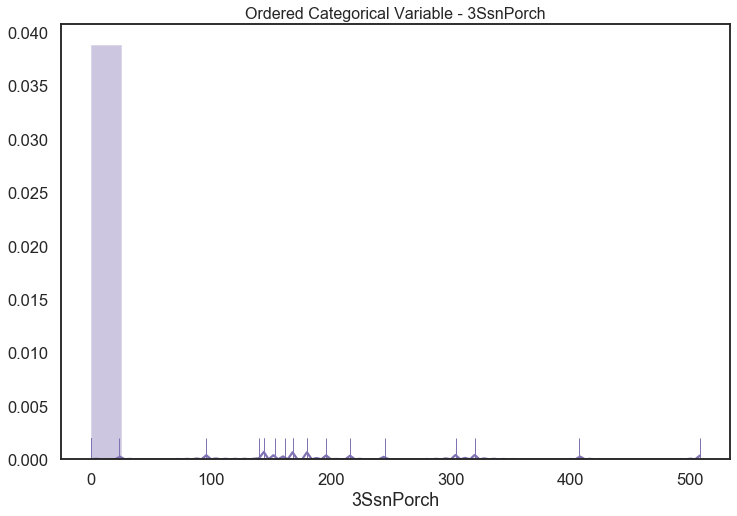

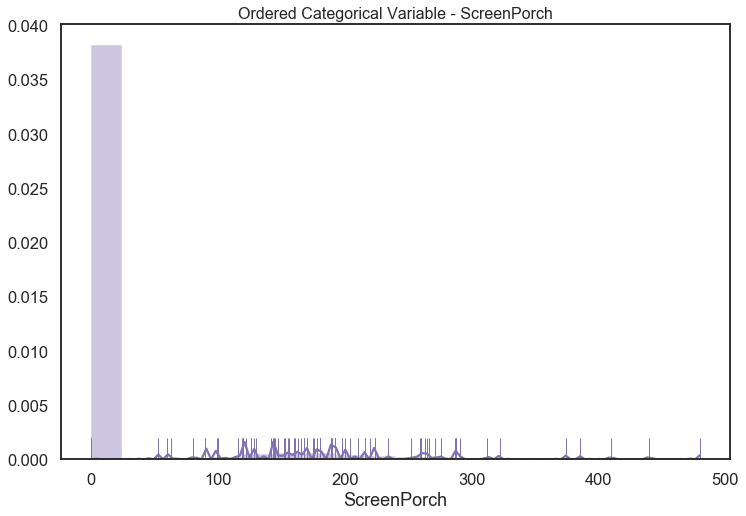

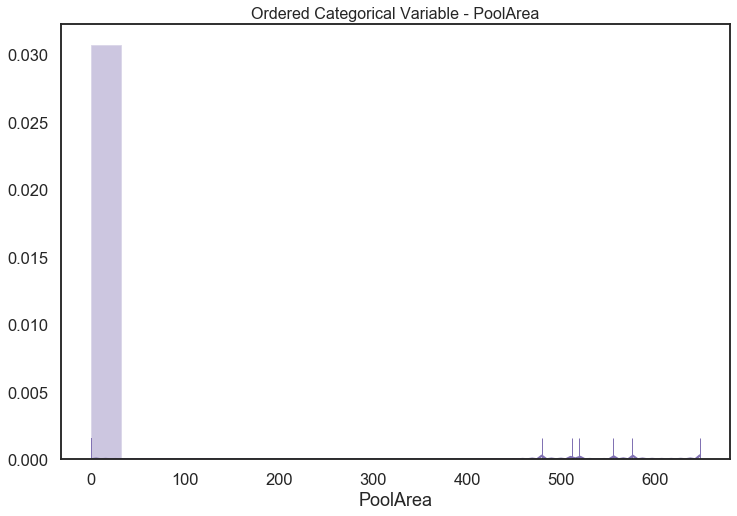

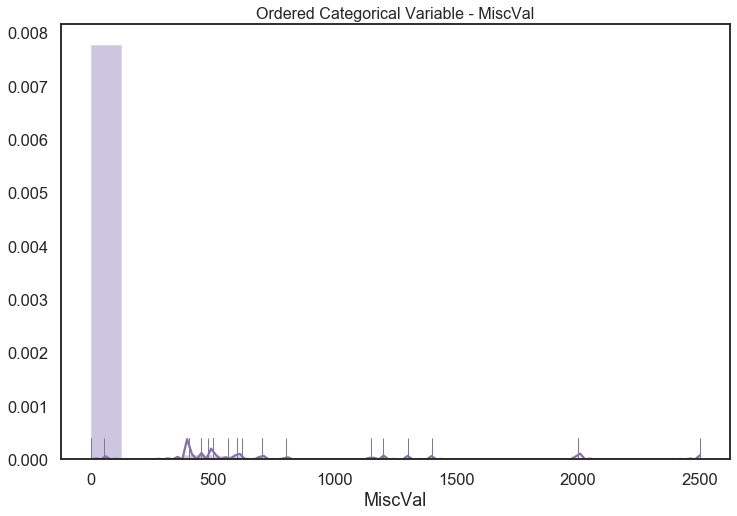

In [21]:
#List of Ordered Variables
OrderedCols = ['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 
               'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
               'GarageYrBlt', 'MoSold', 'YrSold','LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 
               'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea', 
               'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
               'PoolArea', 'MiscVal']

for cols in OrderedCols:
    dfTrain[cols] = dfTrain[cols].fillna(0)
    plt.subplots(figsize=(12,8), sharex=True)
    sns.distplot(dfTrain[cols], color='m', kde=True, rug=True, bins=20)
    plt.title("Ordered Categorical Variable - "+ cols, fontsize=16)
    plt.show()

> ## 3.2. Unordered Categorical Variables

> ### The below listed columns are Unordered Categorical Varaibles
> - MSSubClass
> - MSZoning
> - Street
> - Alley
> - LotConfig
> - Neighborhood
> - Condition1
> - Condition2
> - RoofStyle
> - RoofMatl
> - Exterior1st
> - Exterior2nd
> - MasVnrType
> - Foundation
> - Heating
> - CentralAir
> - Electrical
> - GarageType
> - MiscFeature
> - SaleType
> - SaleCondition

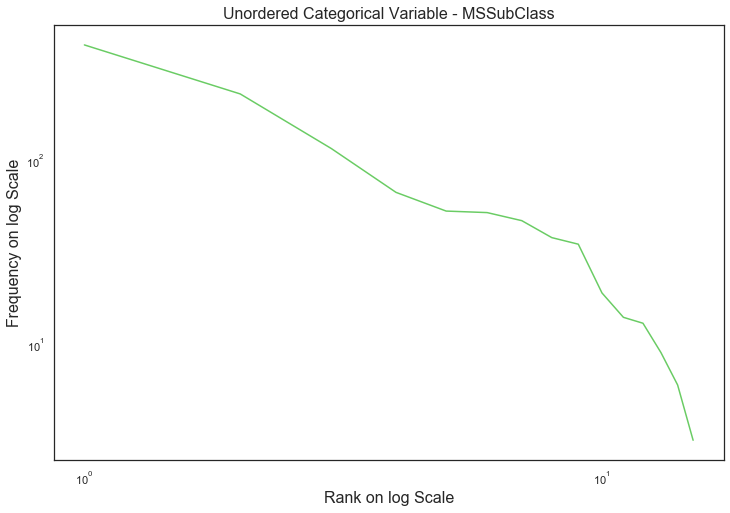

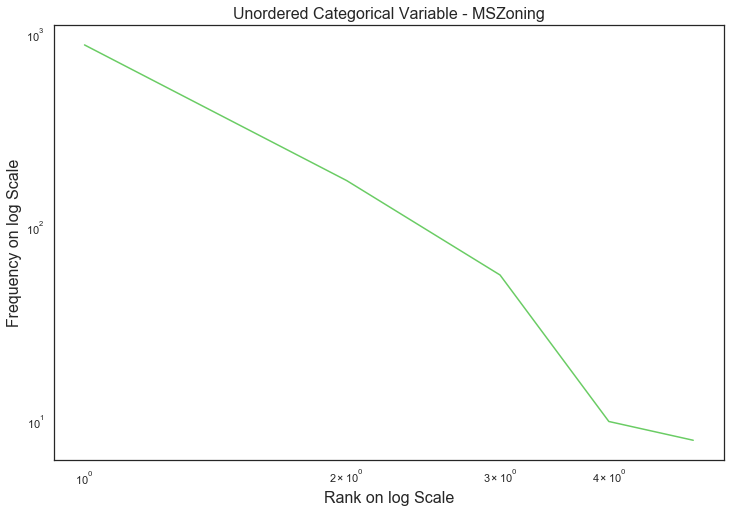

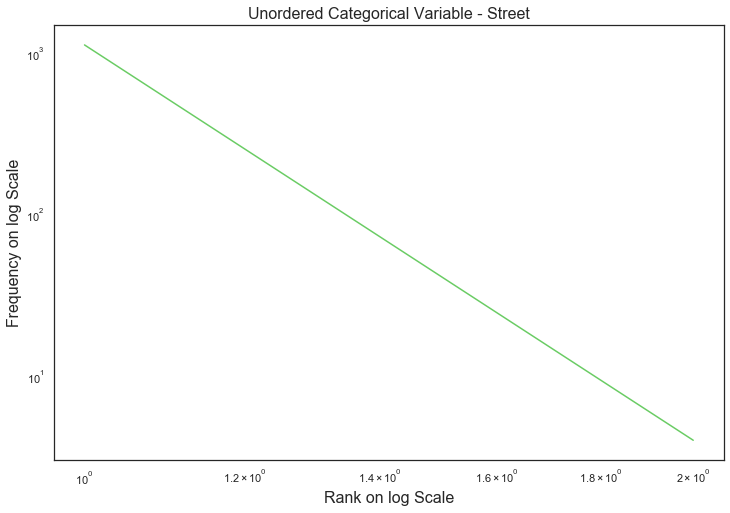

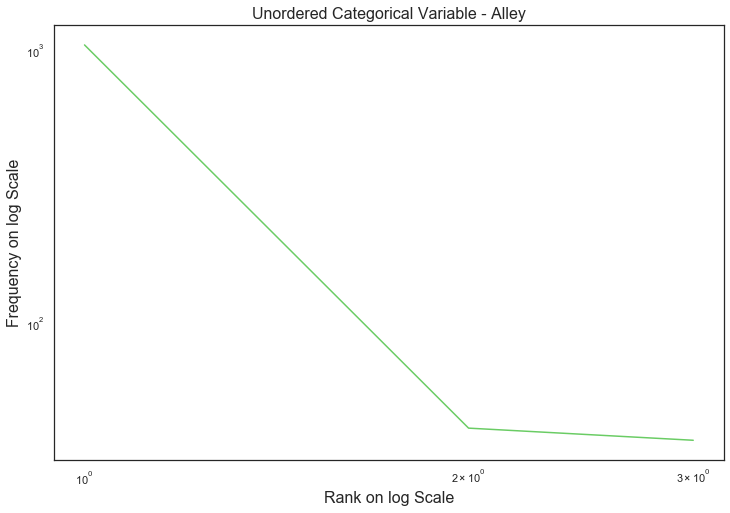

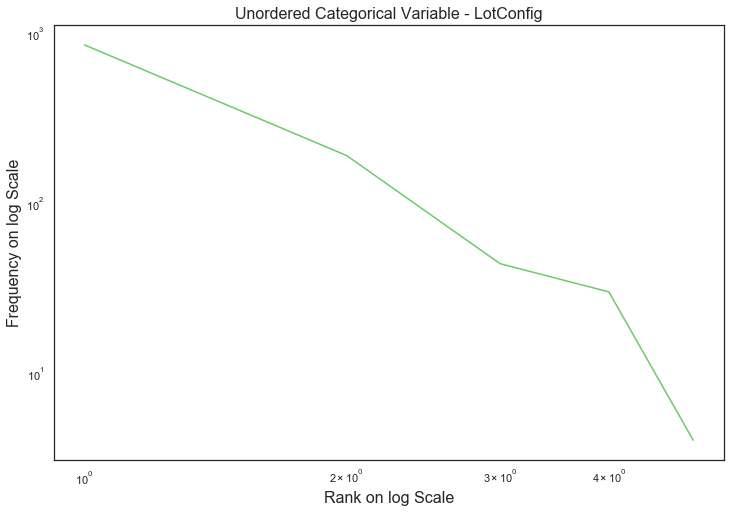

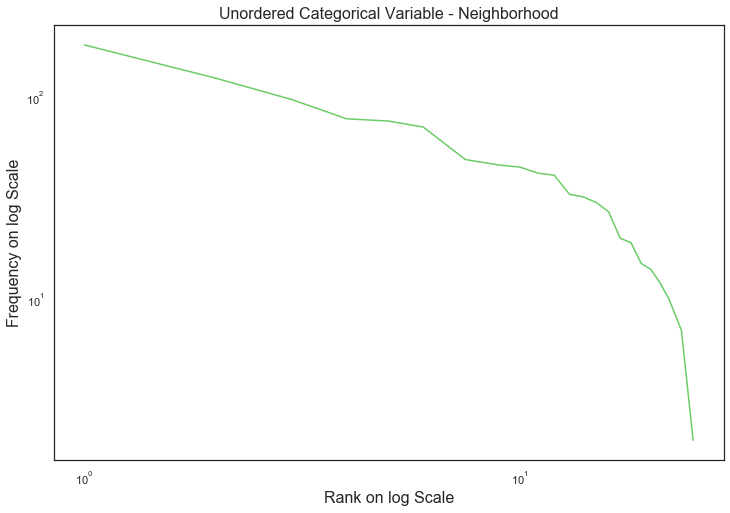

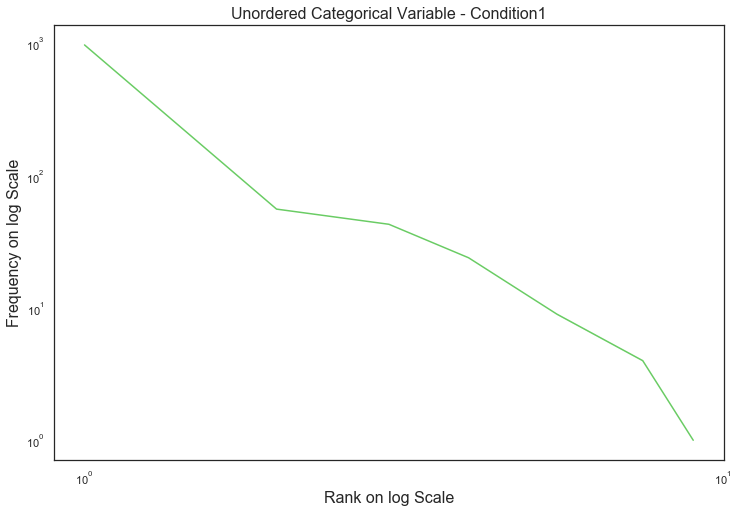

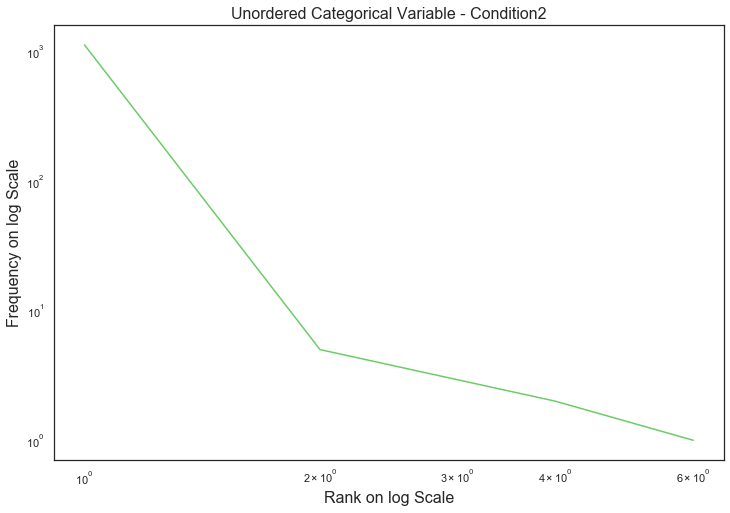

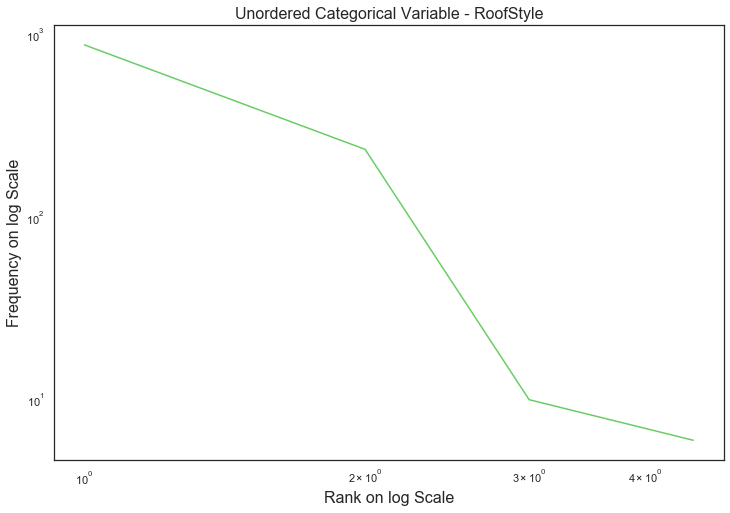

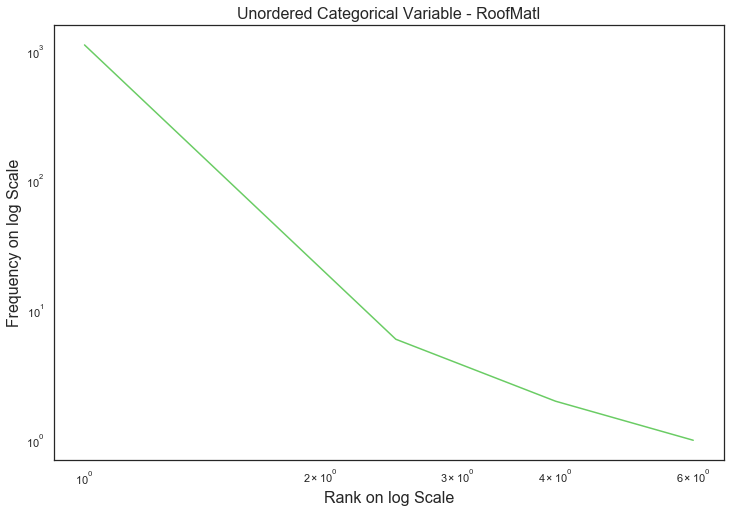

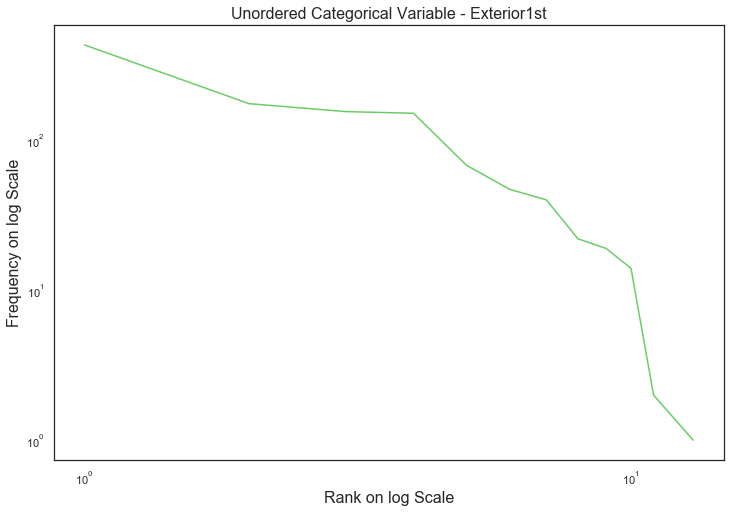

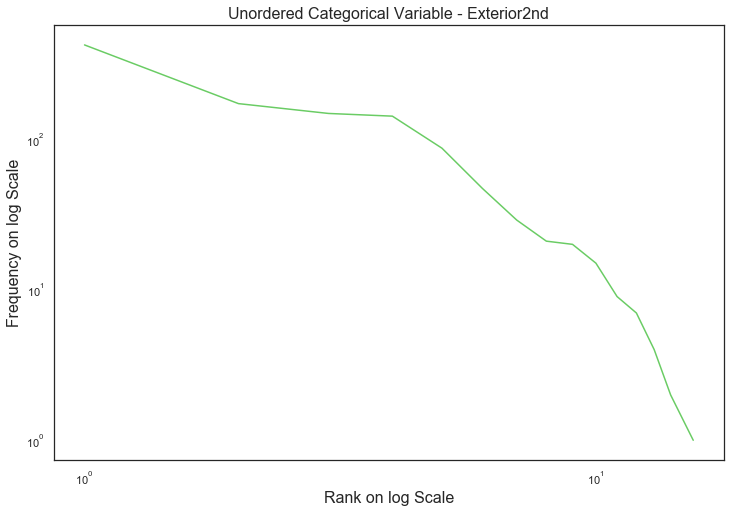

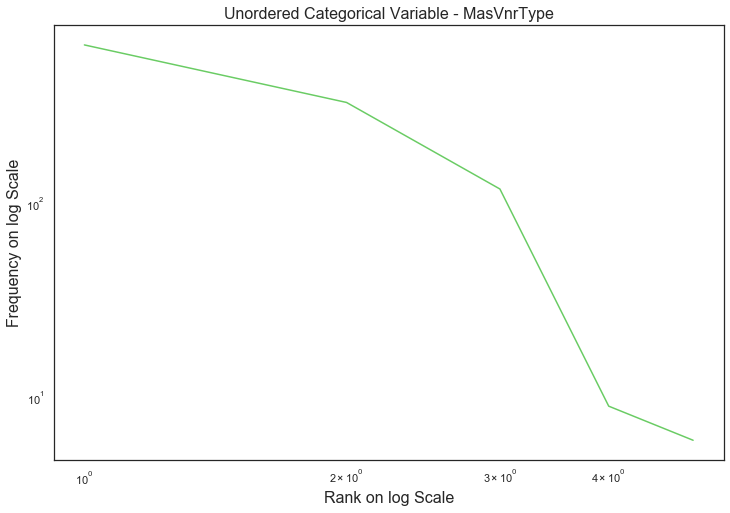

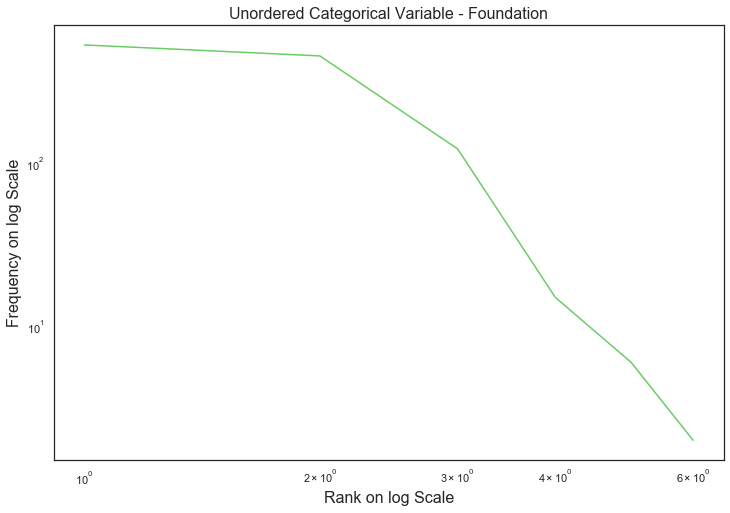

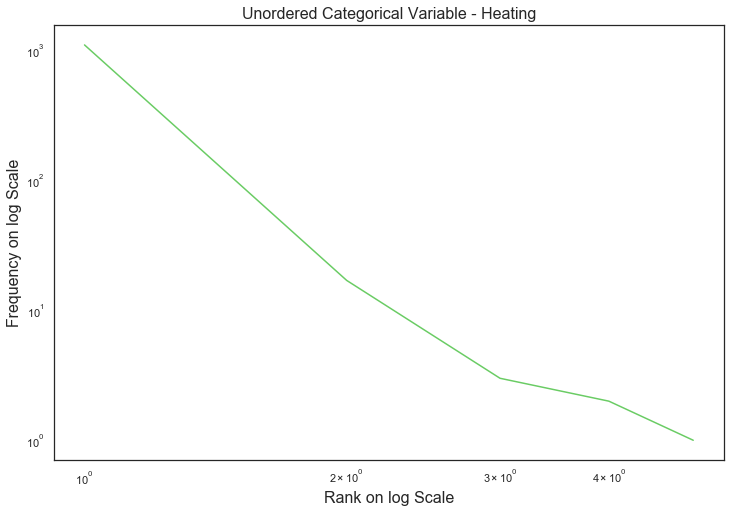

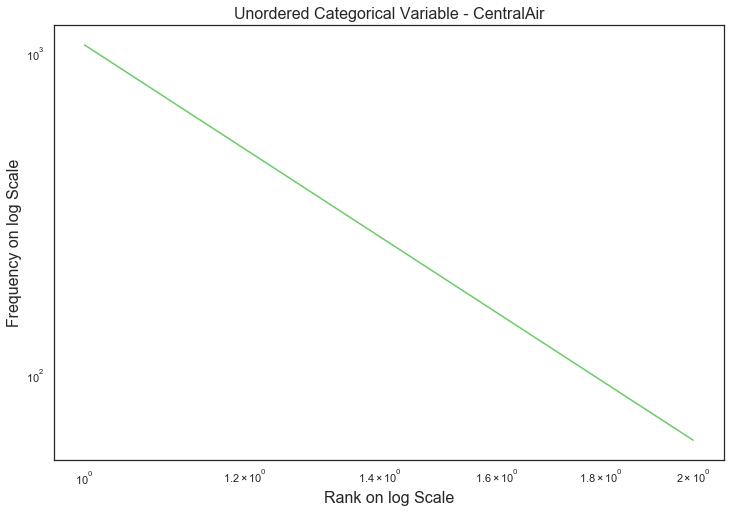

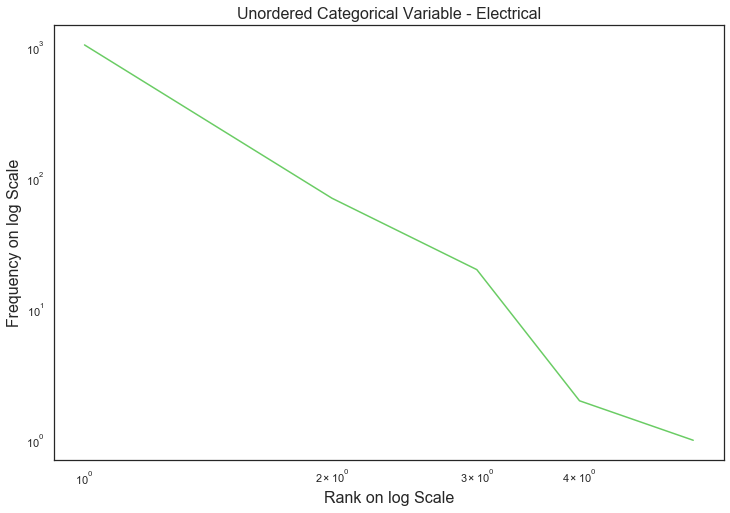

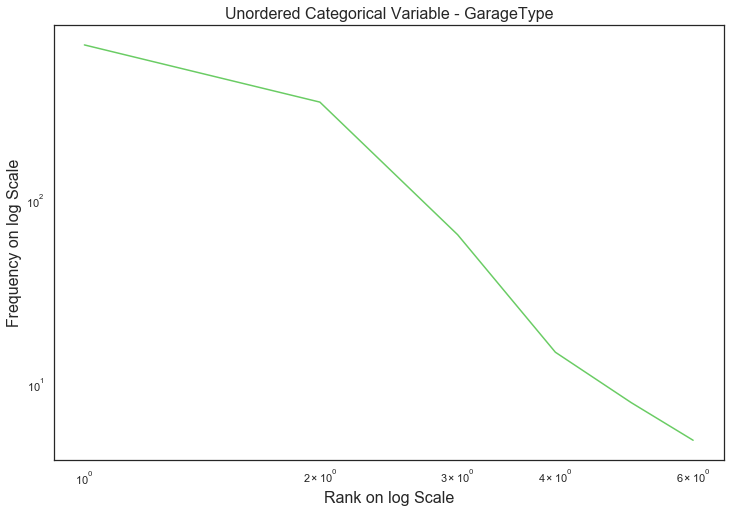

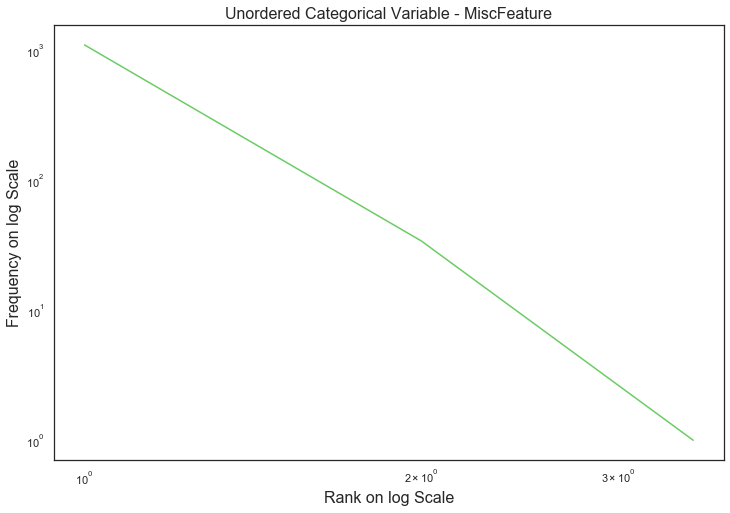

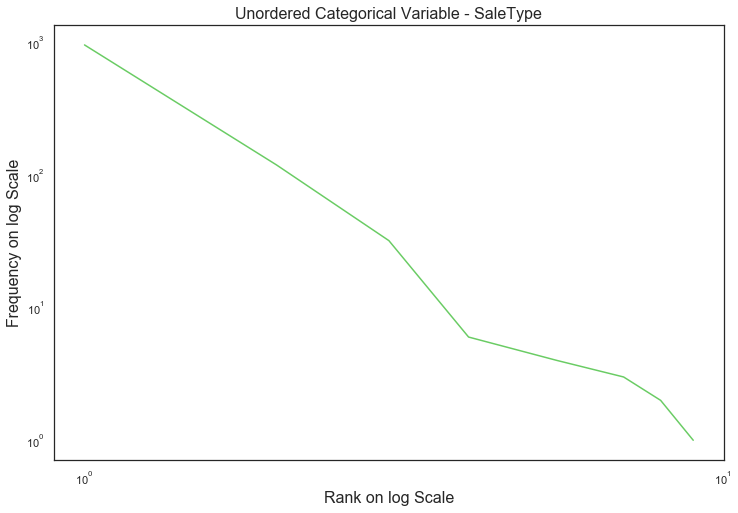

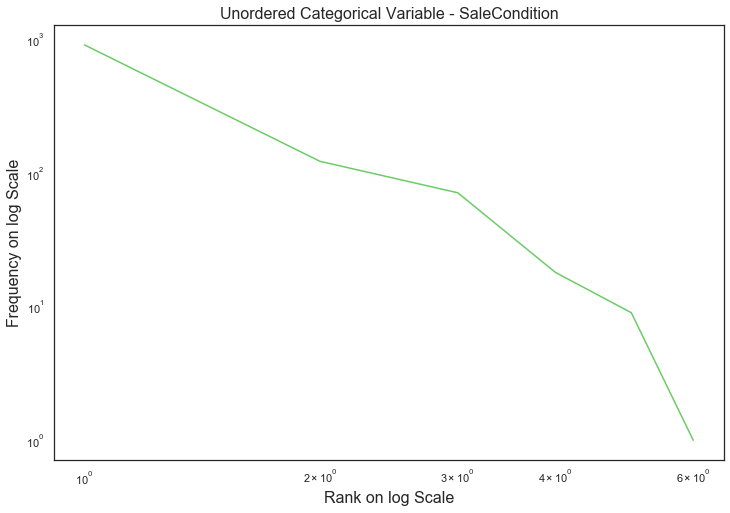

In [22]:
#List of Unordered Variables
UnorderedCols = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotConfig', 'Neighborhood', 'Condition1', 
                 'Condition2', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 
                 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition']

# Set Graph background white
sns.set(style="white", palette="muted", color_codes=True)

for cols in UnorderedCols:
    # plotting X and Y axis
    plt.subplots(figsize=(12,8), sharex=True)
    s = sns.lineplot(x=dfTrain[cols].value_counts().rank(ascending=False).sort_values(ascending=True), 
                     y=dfTrain[cols].value_counts().sort_values(ascending=False), markers=True, dashes=False, 
                     data=dfTrain, color="g")
    
    #setting Scale as Log
    s.set_xscale('log')
    s.set_yscale('log')
    
    # Providing Label
    plt.xlabel('Rank on log Scale', fontsize=16)
    plt.ylabel('Frequency on log Scale', fontsize=16)
    plt.title("Unordered Categorical Variable - "+ cols, fontsize=16)
    plt.show()


> ## 3.3. Quantitative Variables

> ### The below listed numeric columns Categorical Varaibles

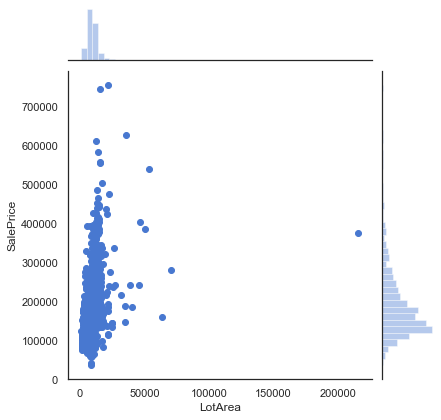

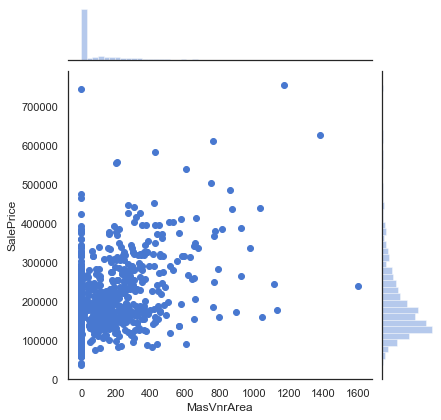

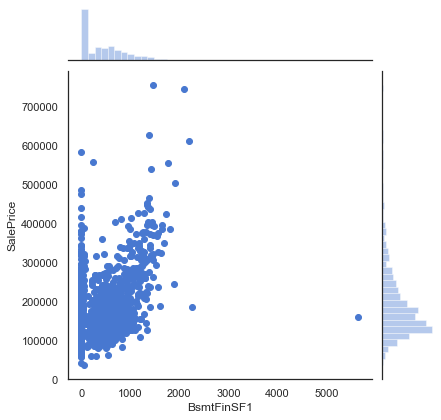

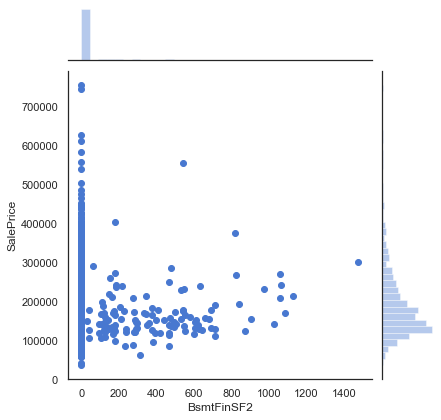

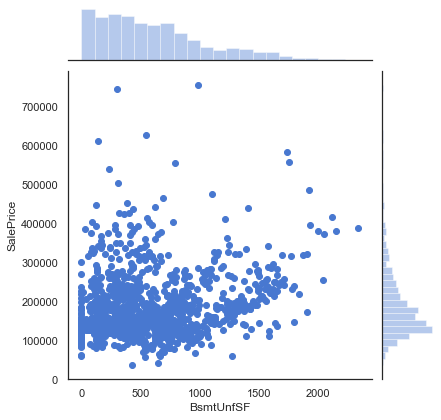

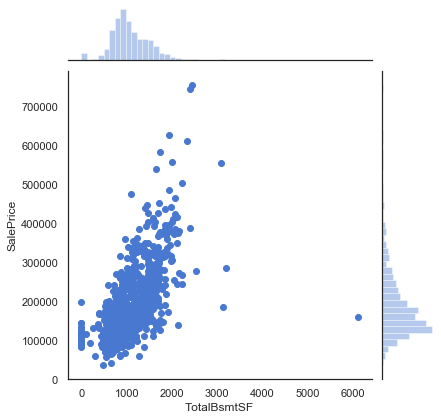

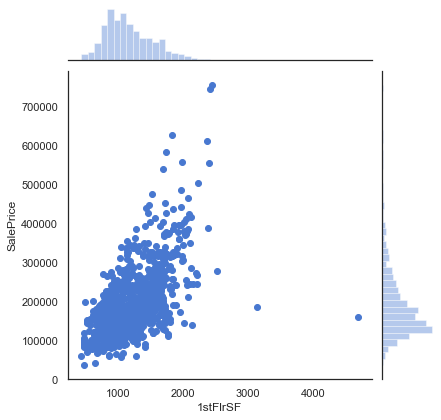

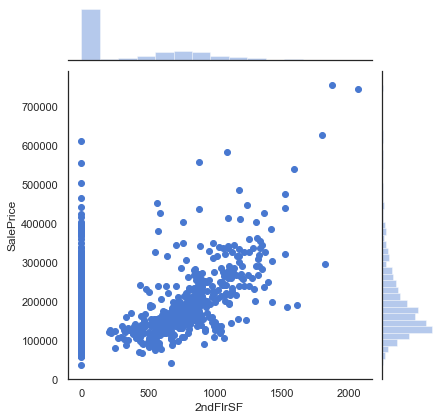

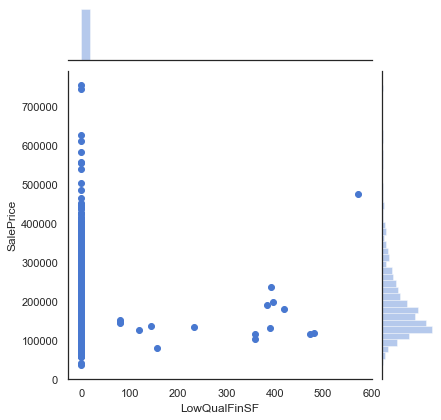

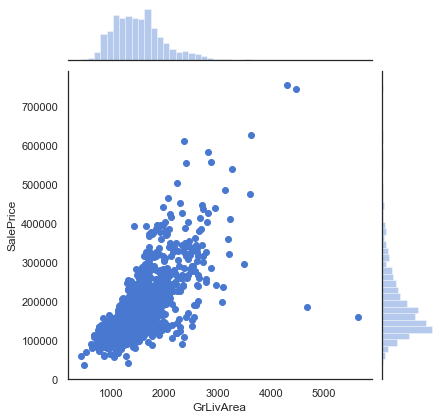

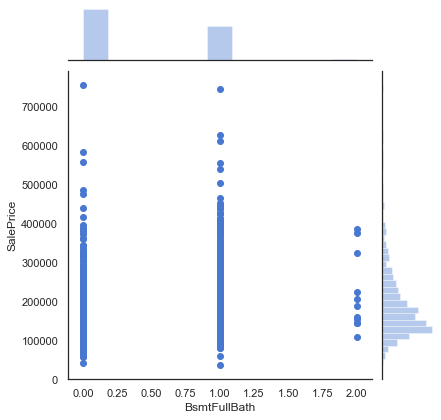

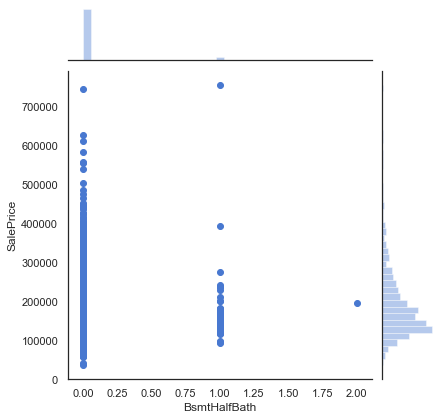

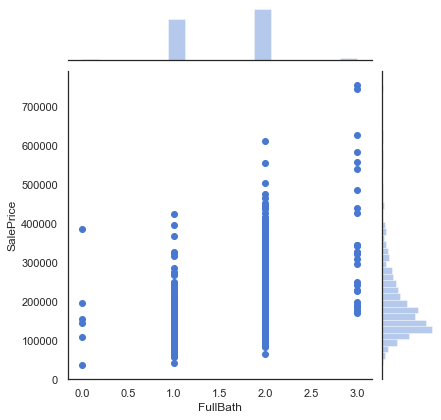

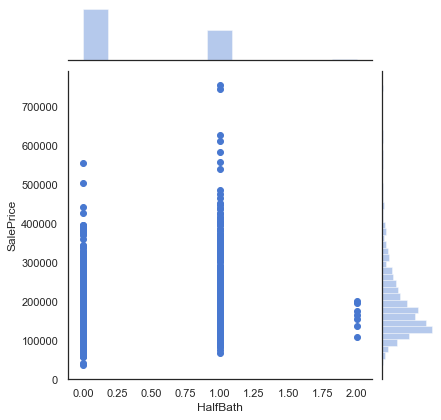

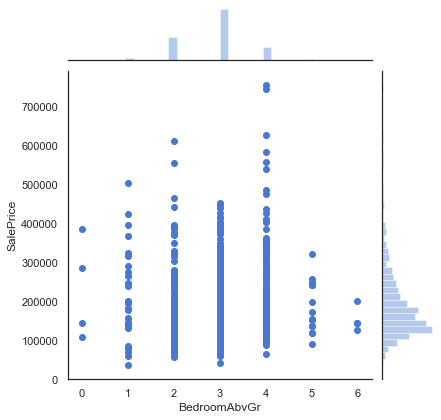

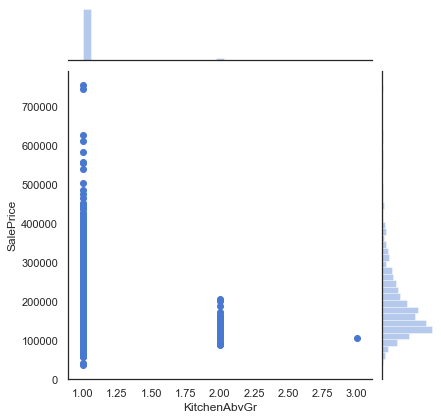

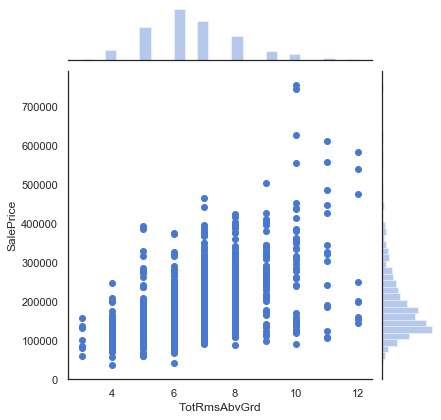

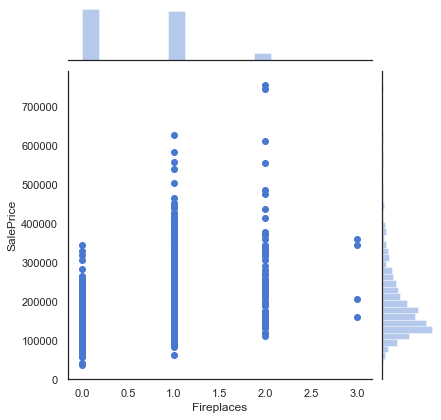

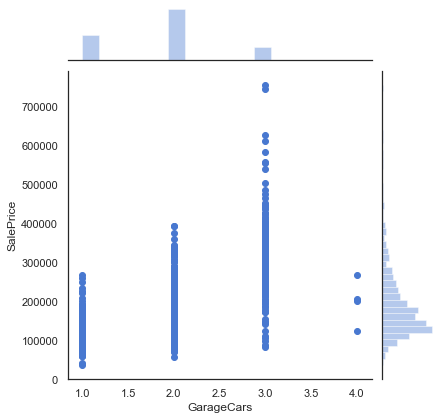

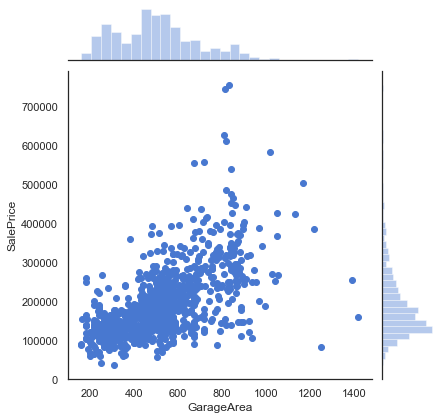

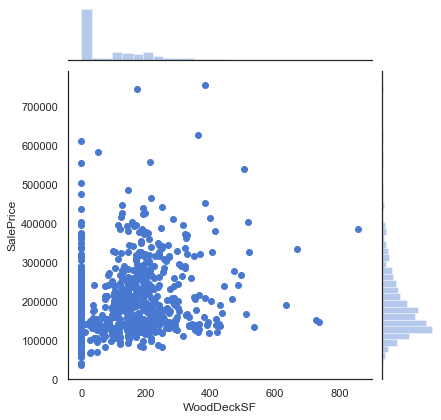

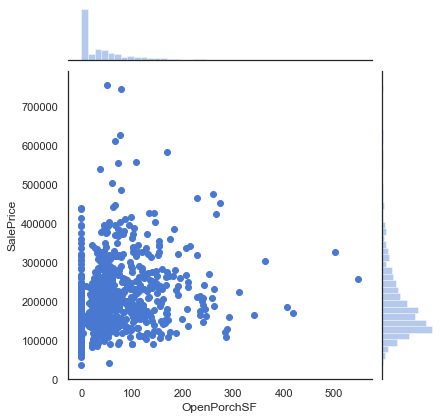

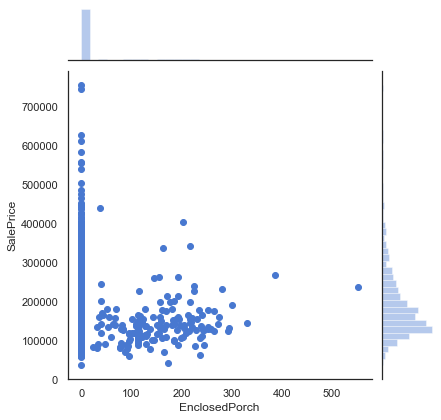

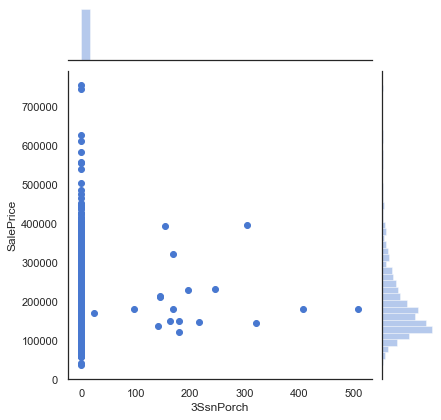

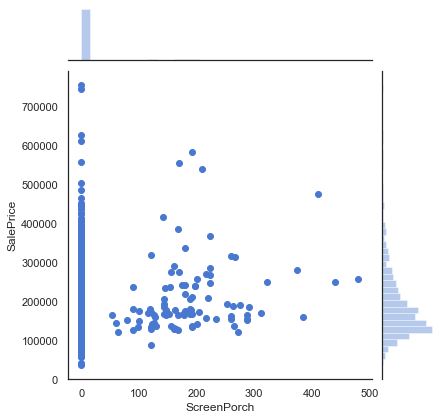

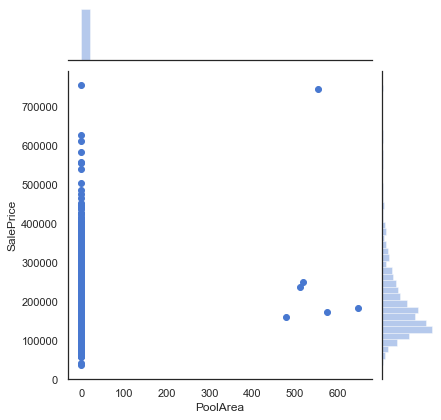

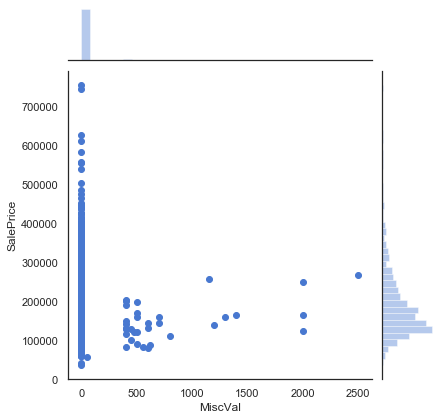

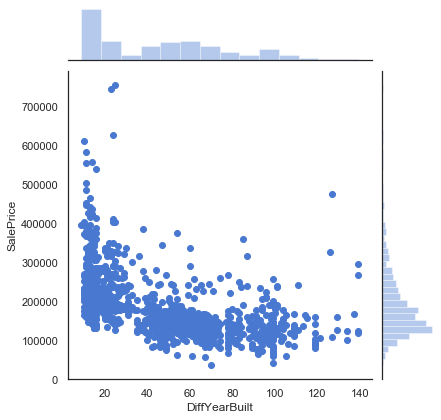

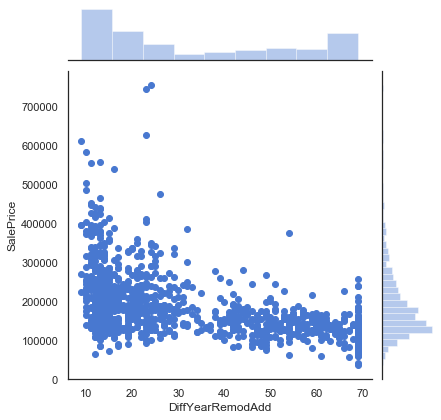

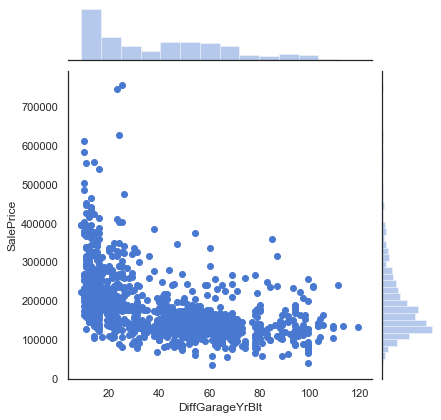

In [23]:
# NUMERICAL COLUMNS: 
num_col = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 
           '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
           'BedroomAbvGr','KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
           'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'DiffYearBuilt', 
           'DiffYearRemodAdd','DiffGarageYrBlt']

#scattered Plot
for col in num_col:
    #plt.subplots(figsize=(12,8), sharex=True)
    sns.jointplot(x=dfTrain[col], y=dfTrain['SalePrice'], data=dfTrain)
    plt.show()

> ### The below listed columns Categorical Varaibles

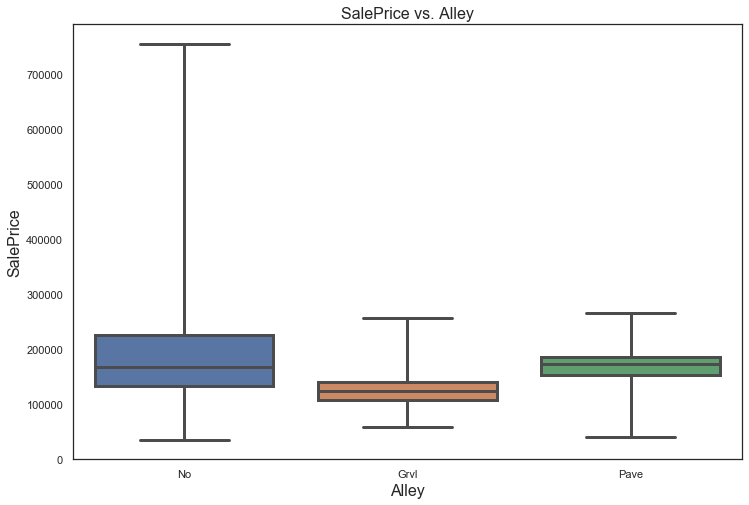

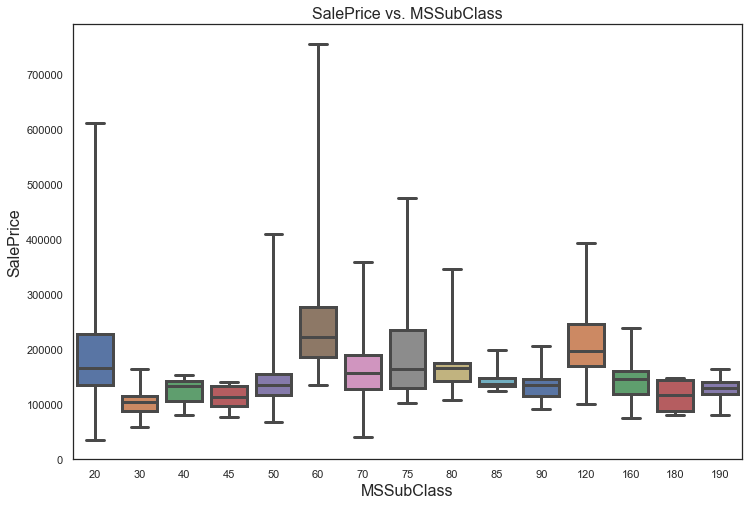

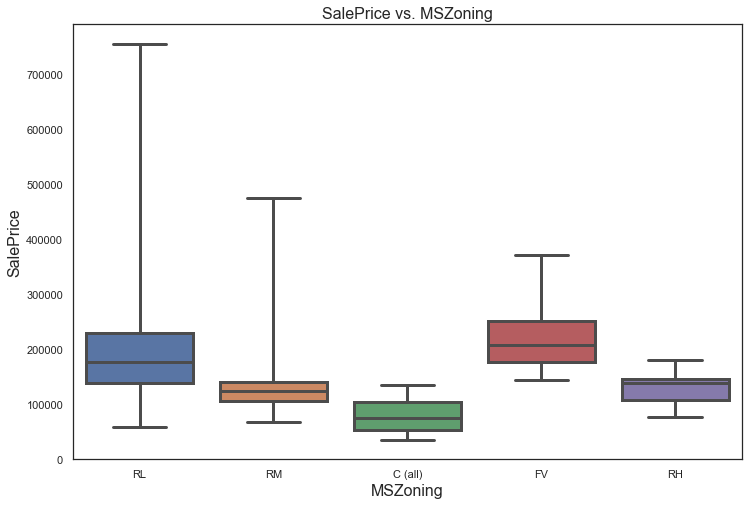

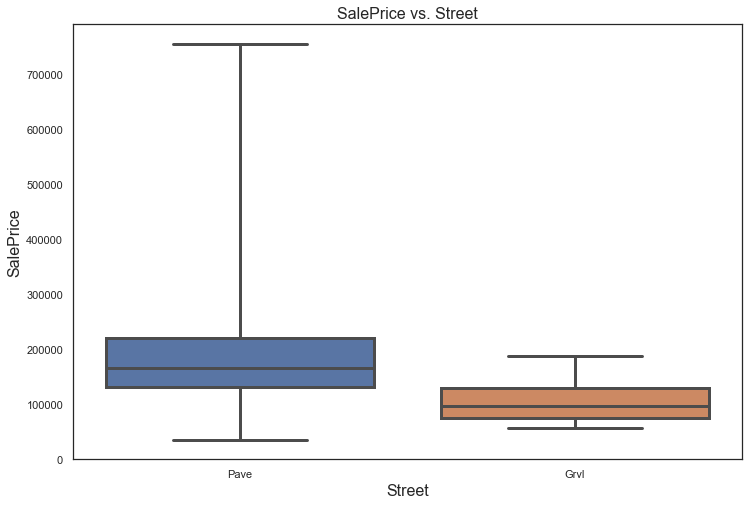

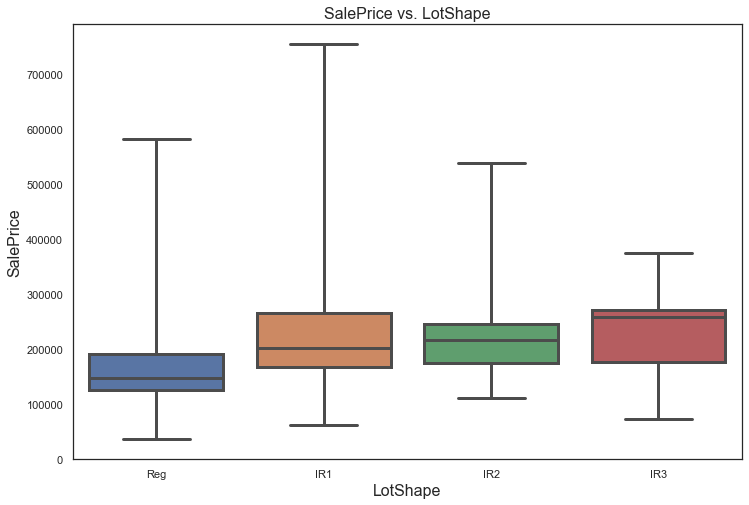

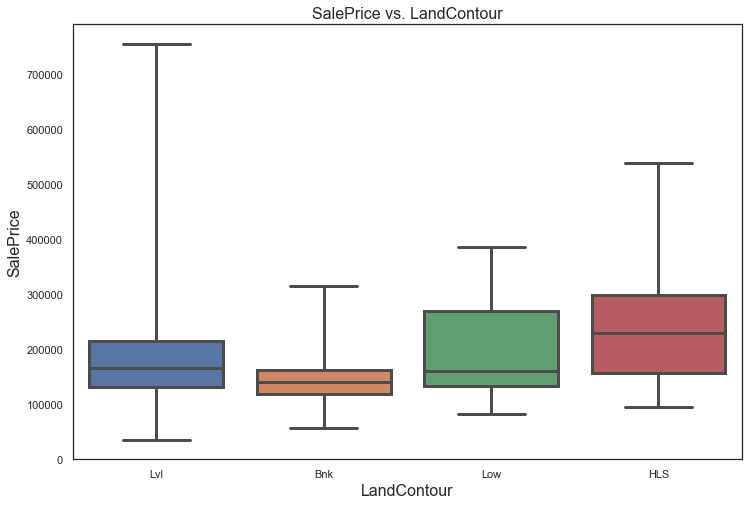

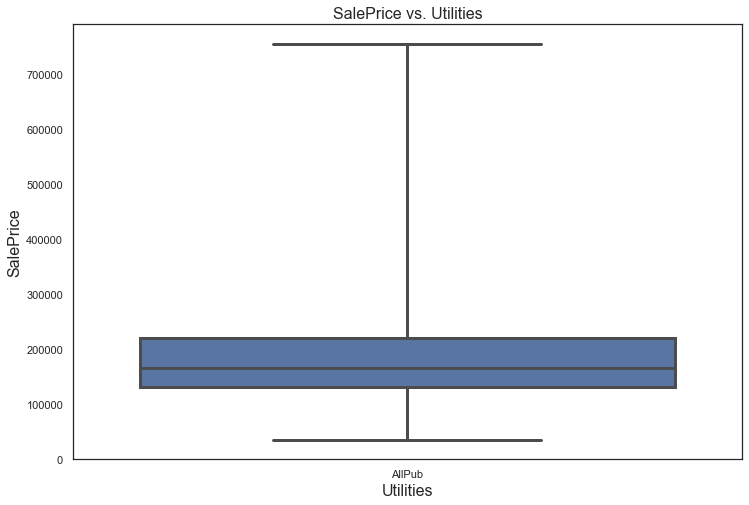

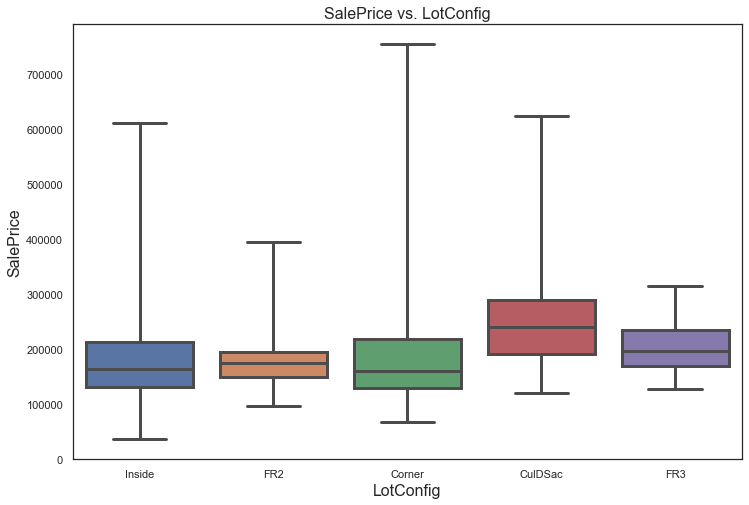

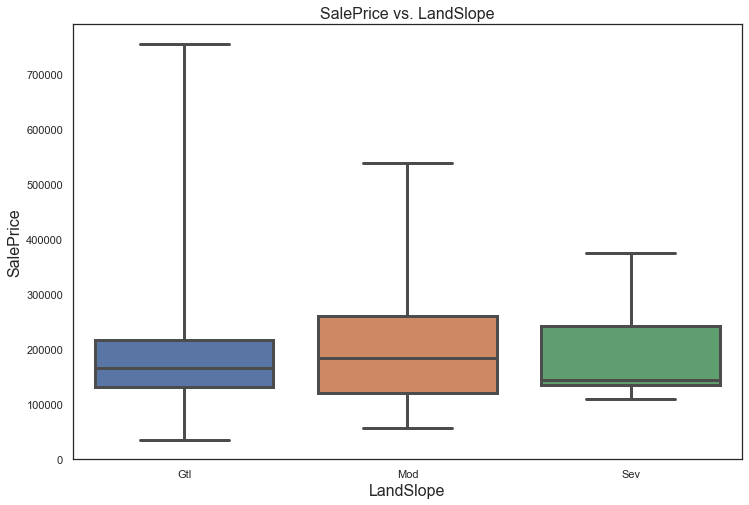

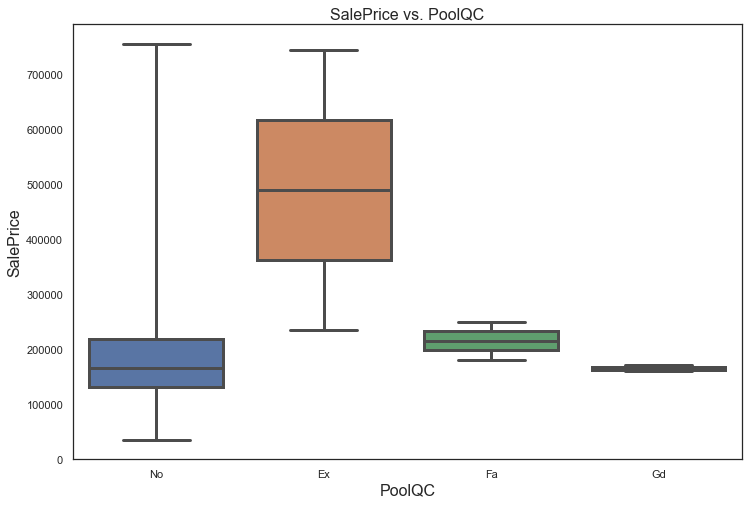

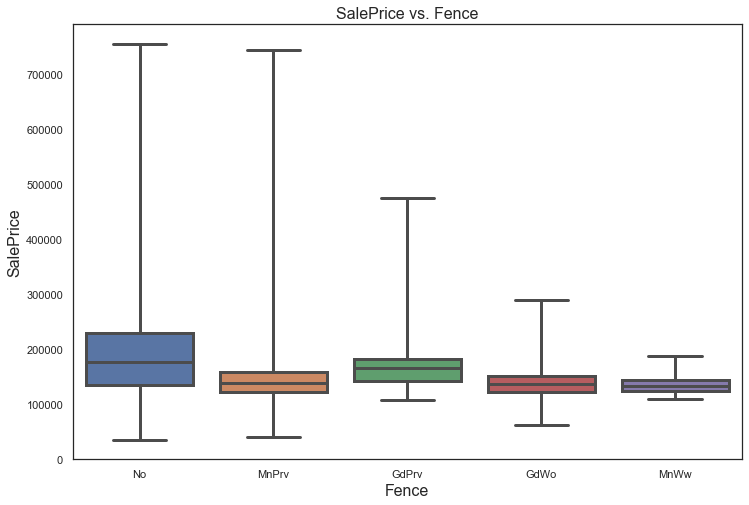

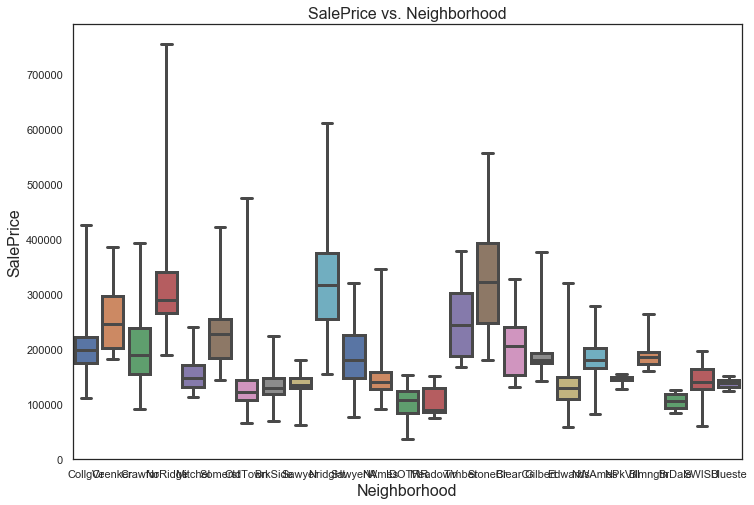

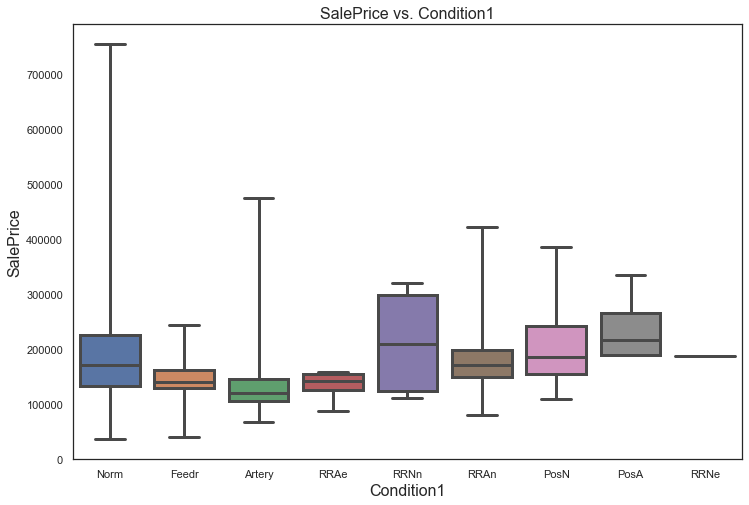

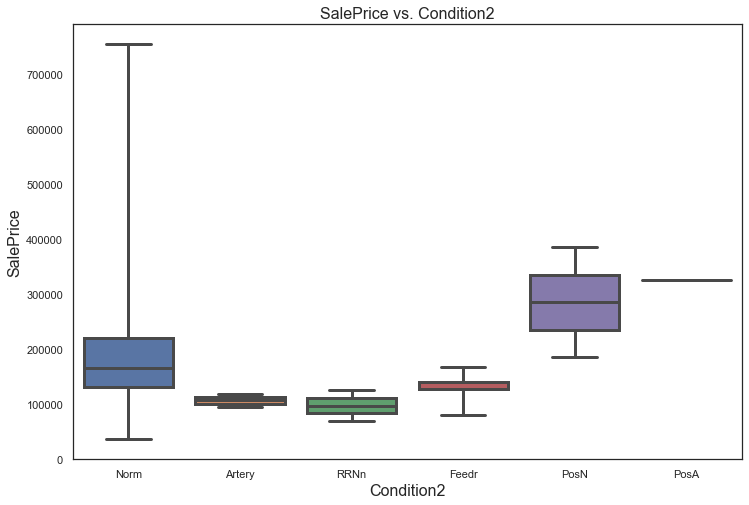

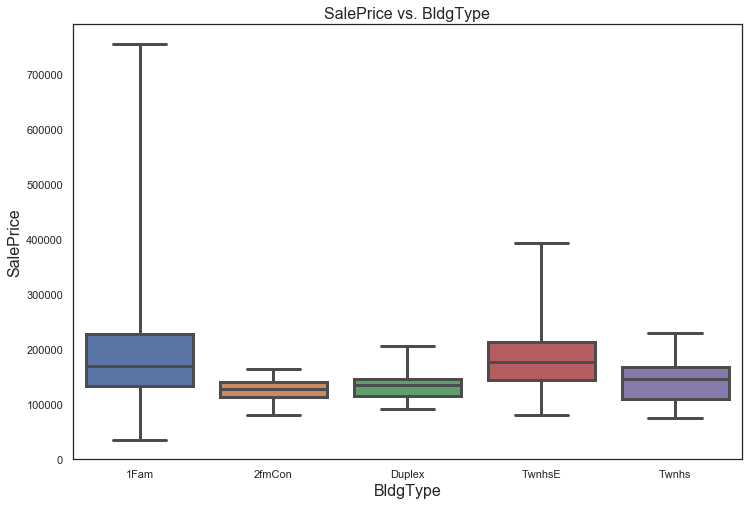

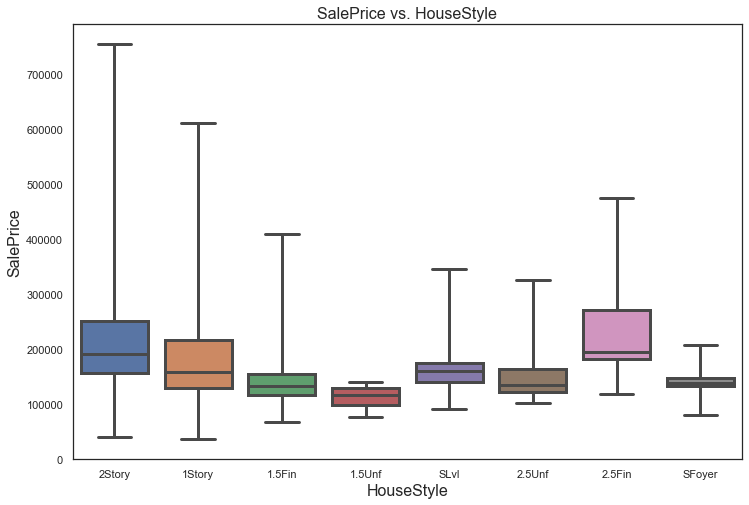

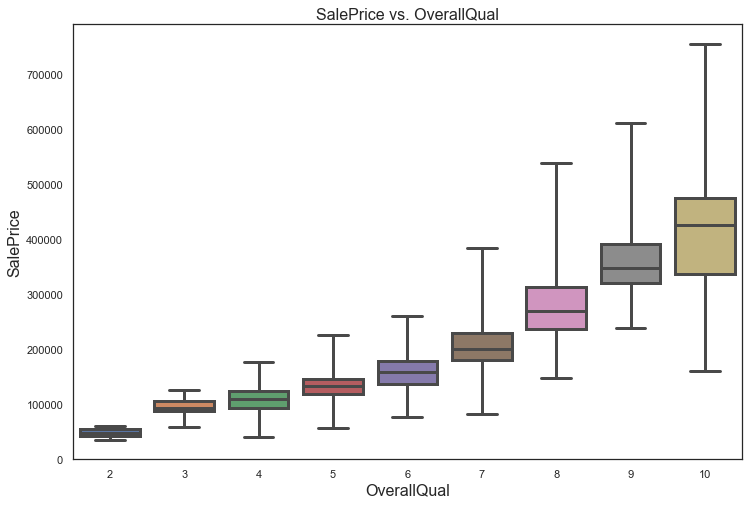

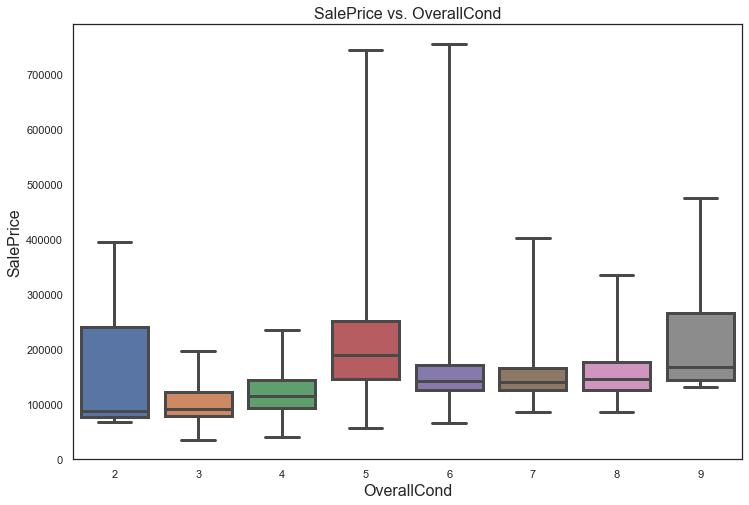

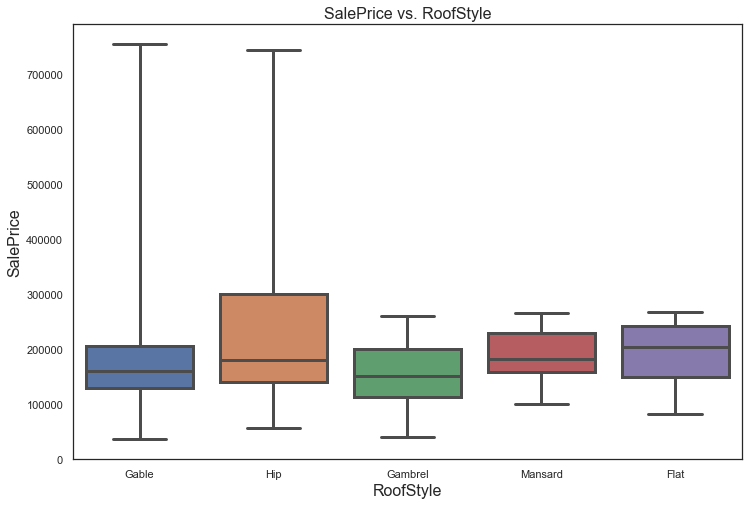

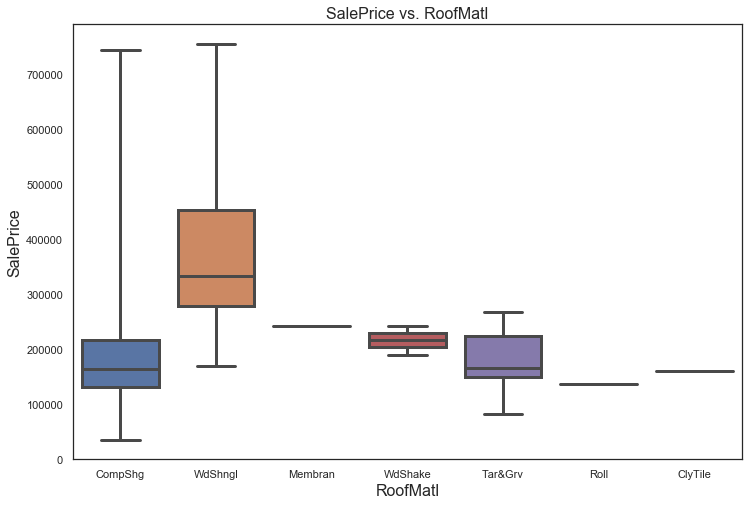

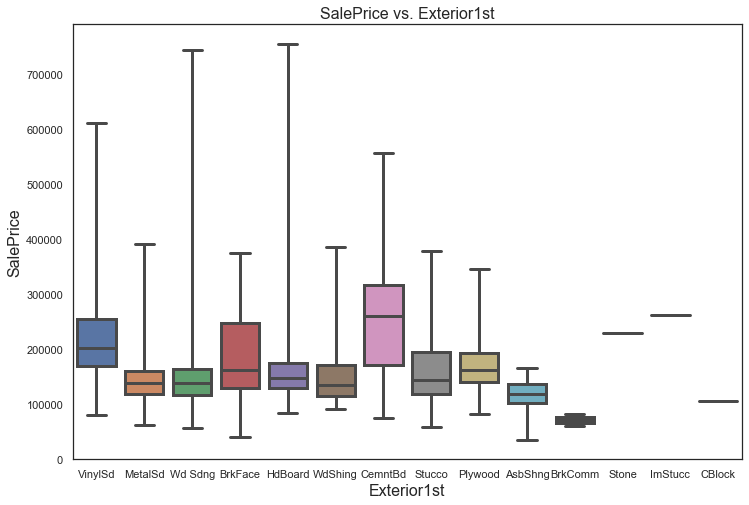

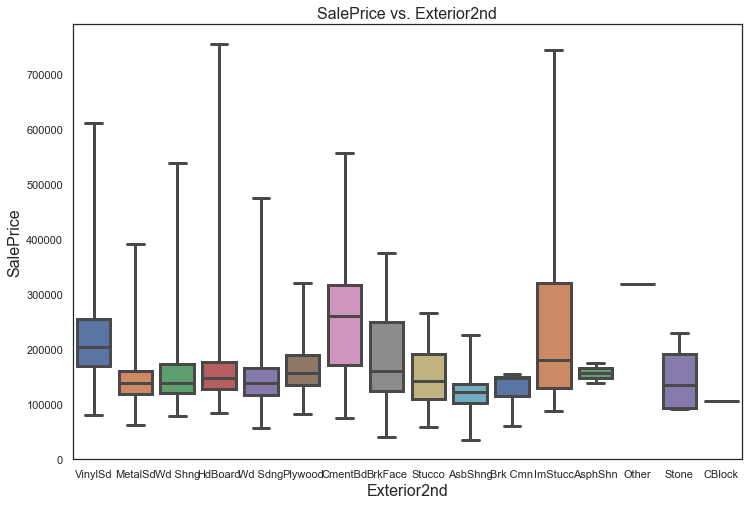

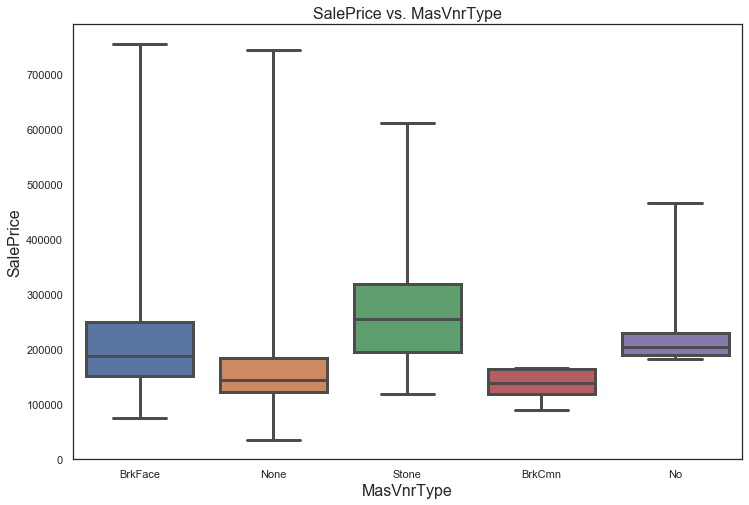

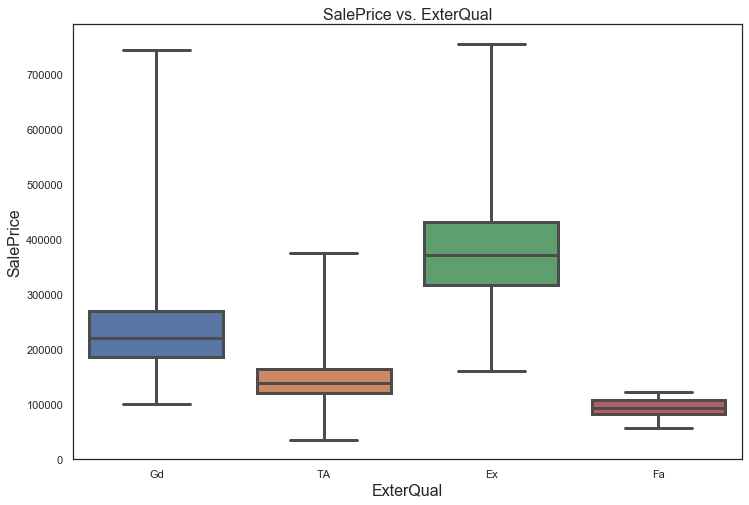

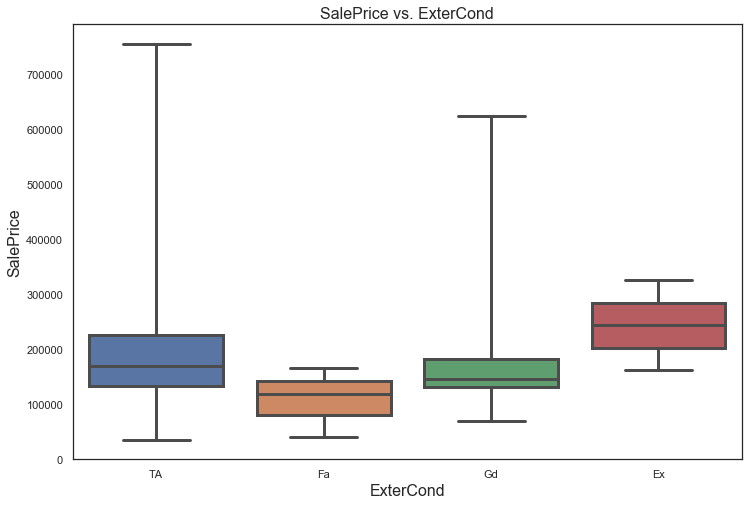

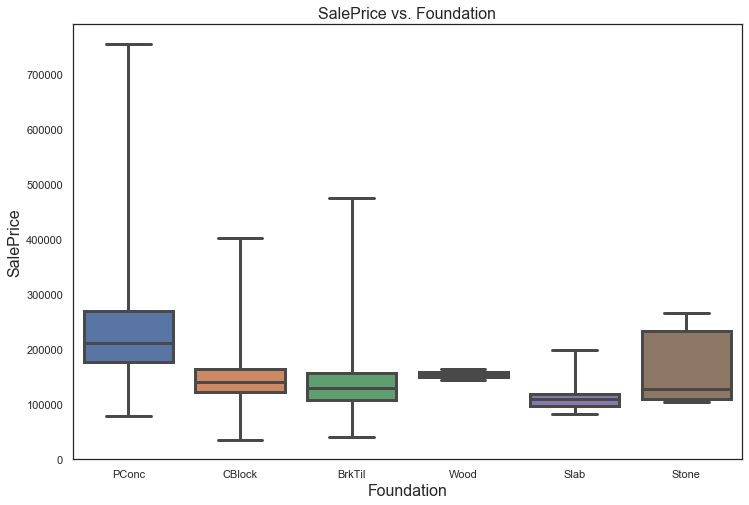

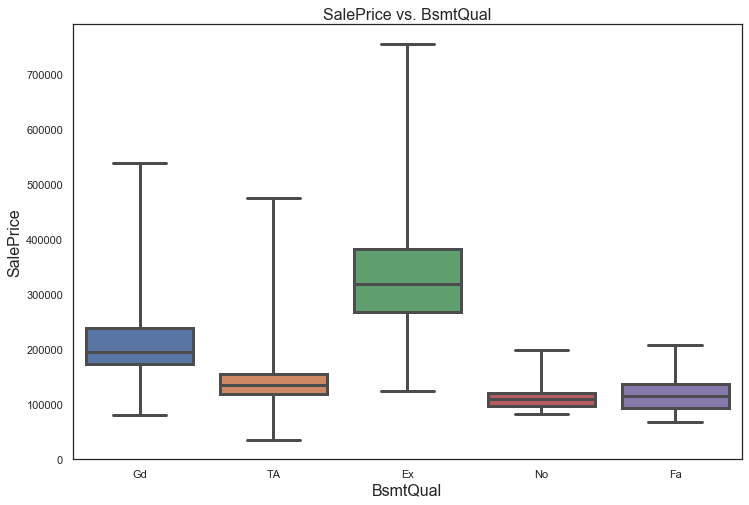

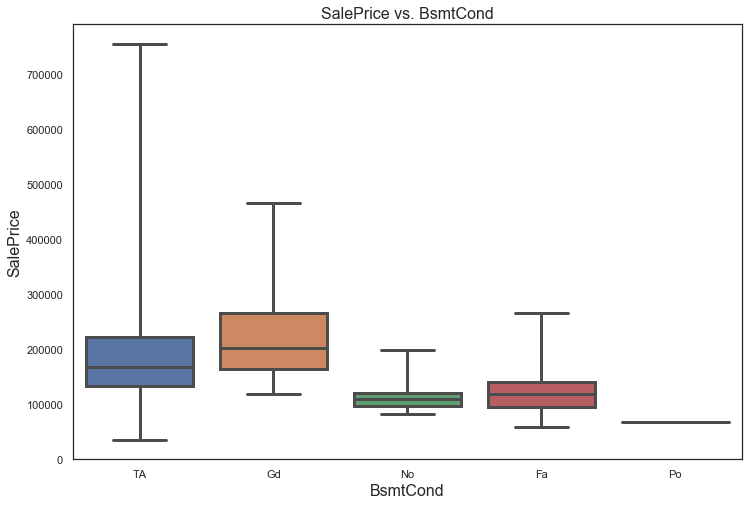

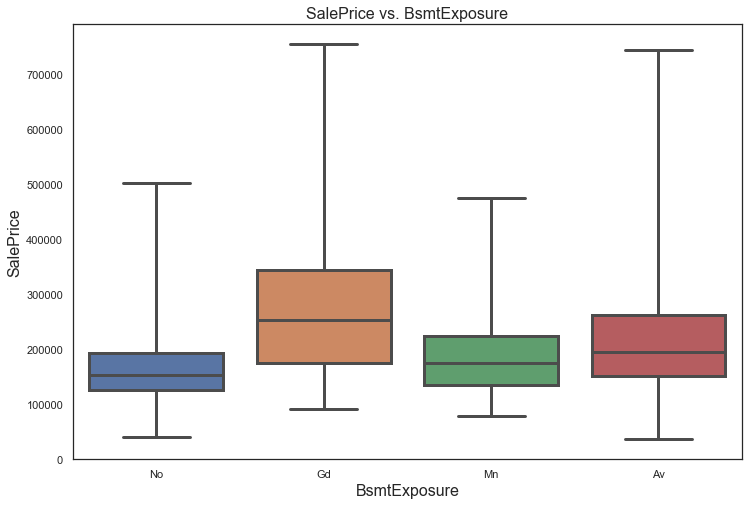

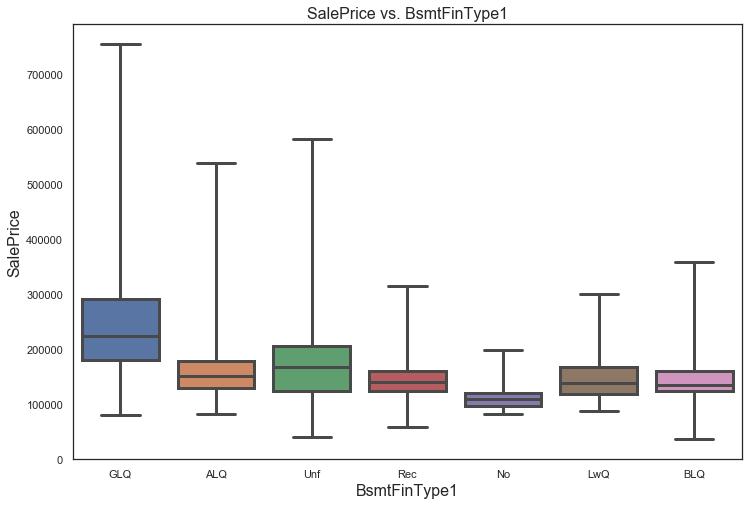

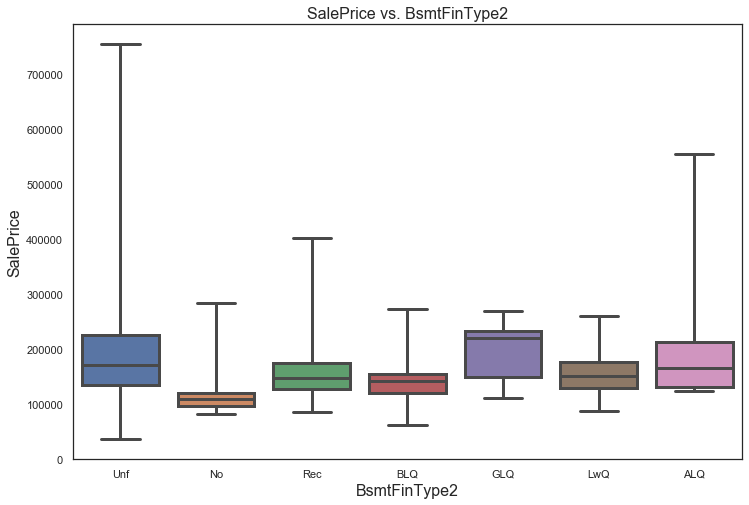

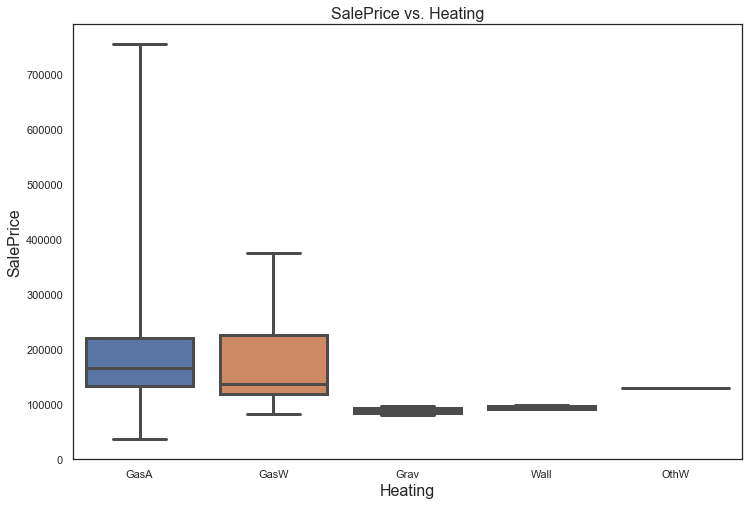

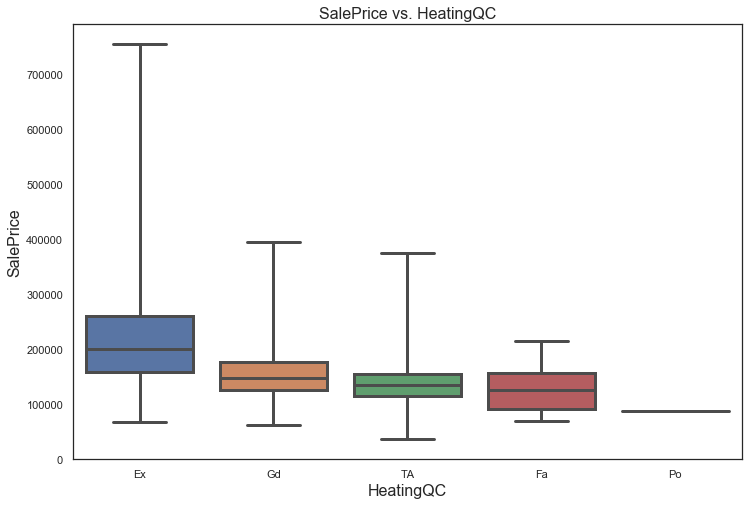

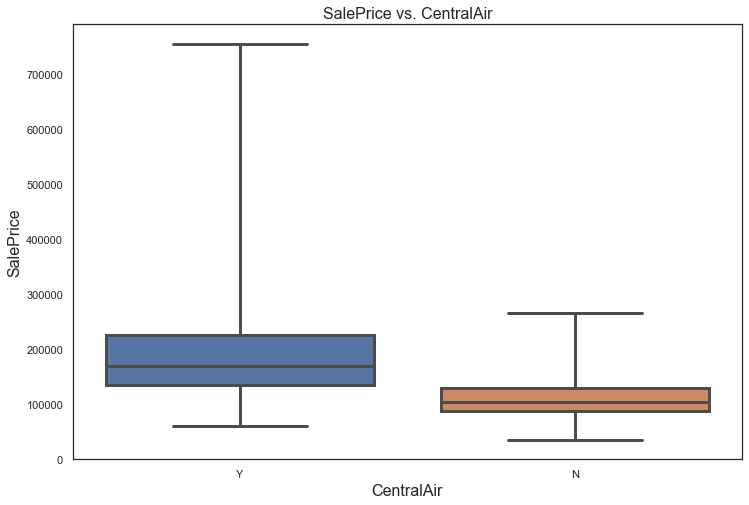

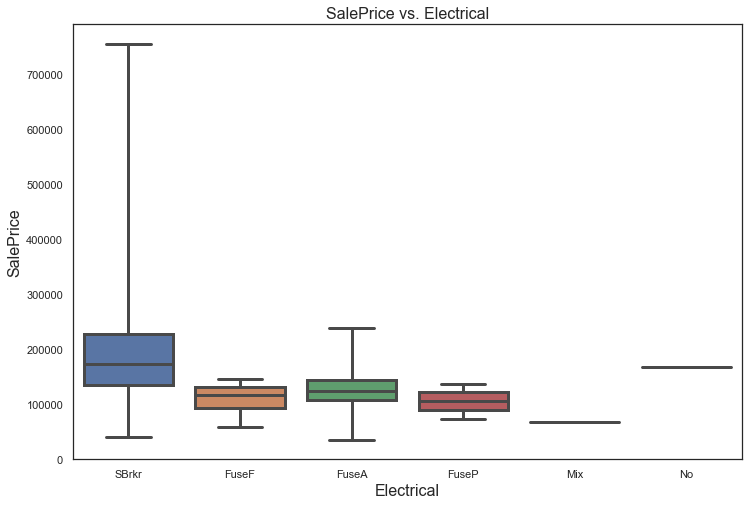

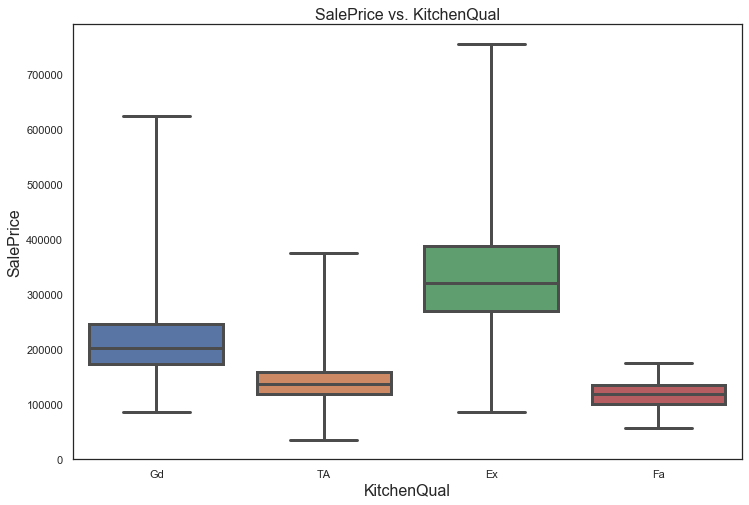

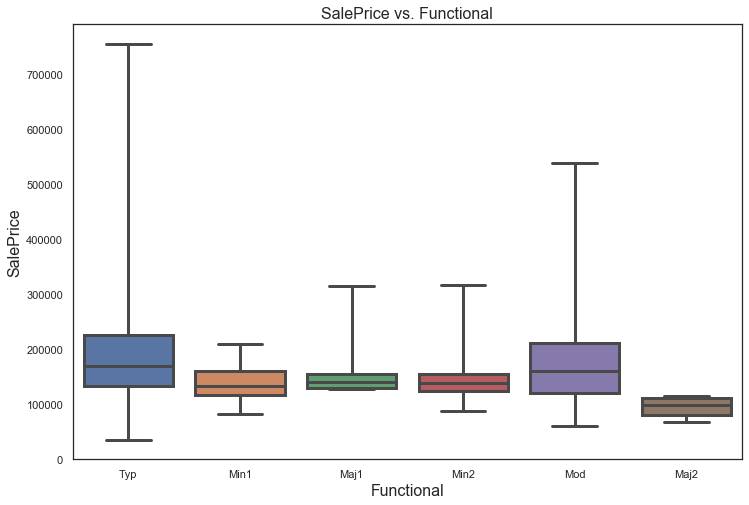

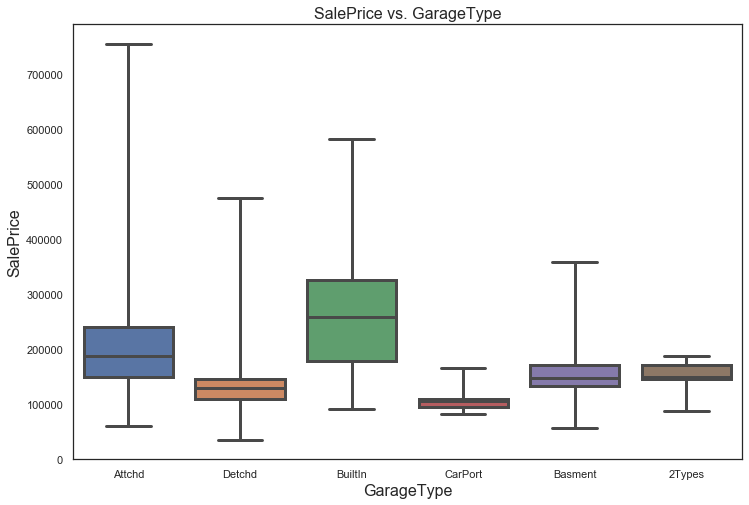

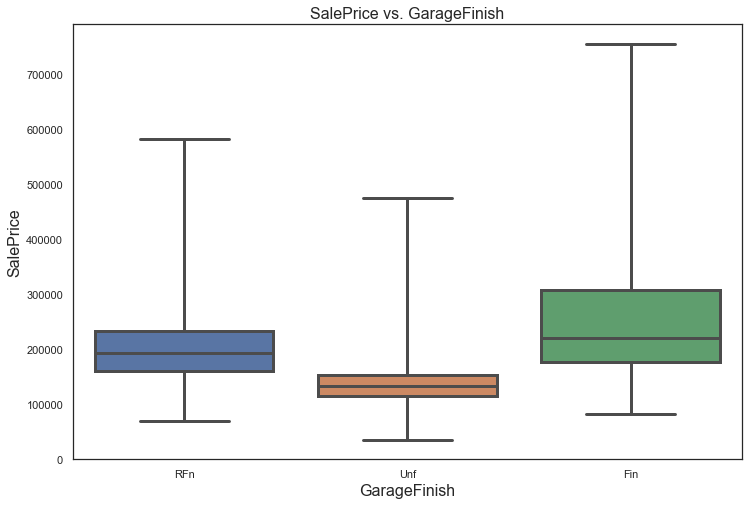

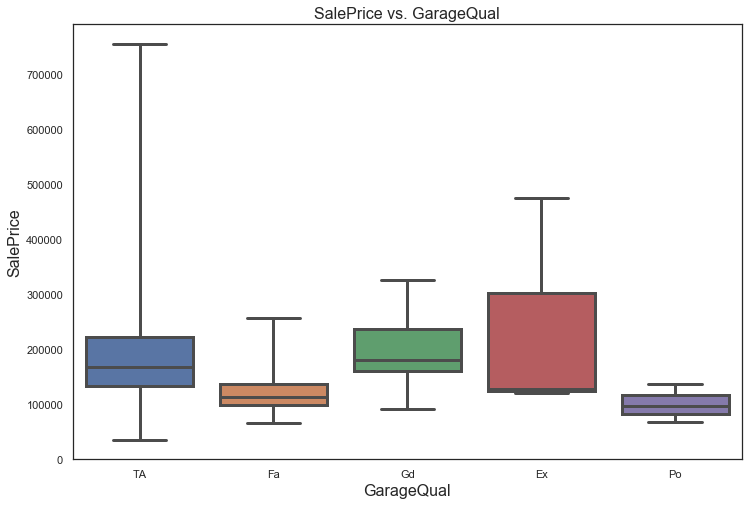

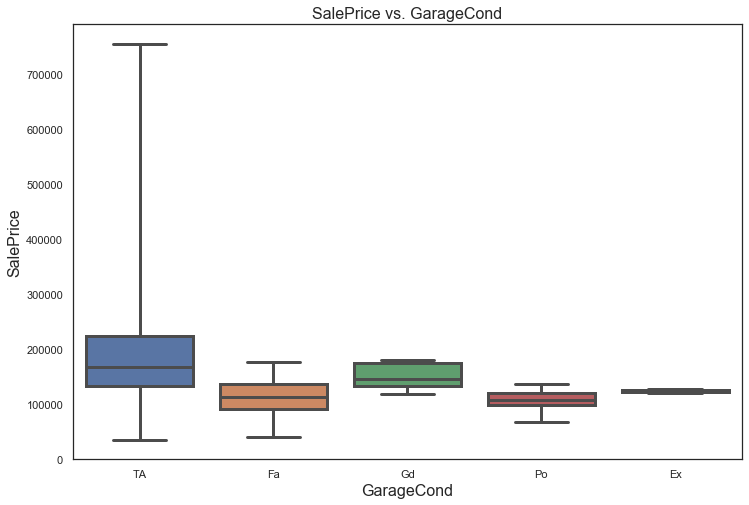

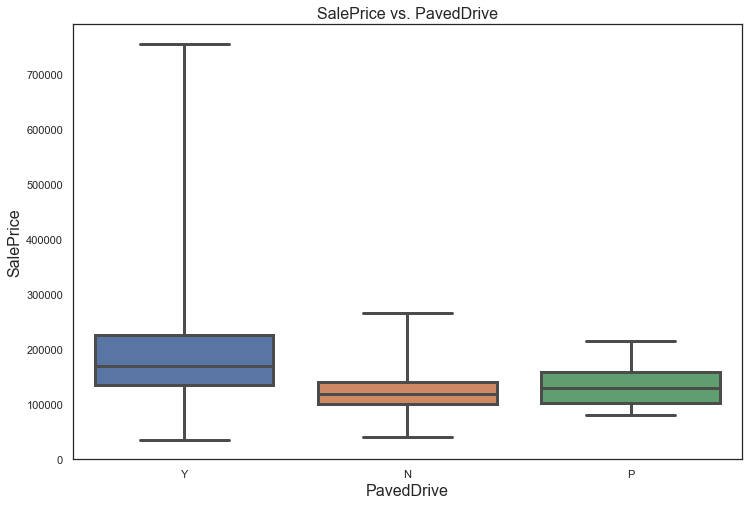

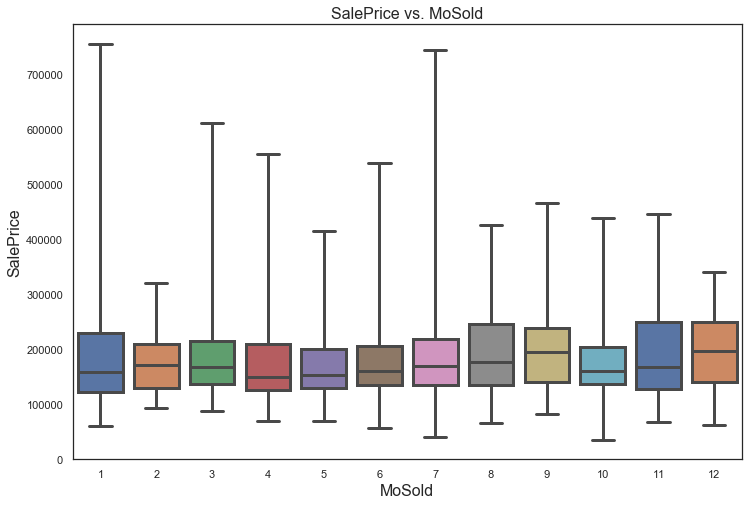

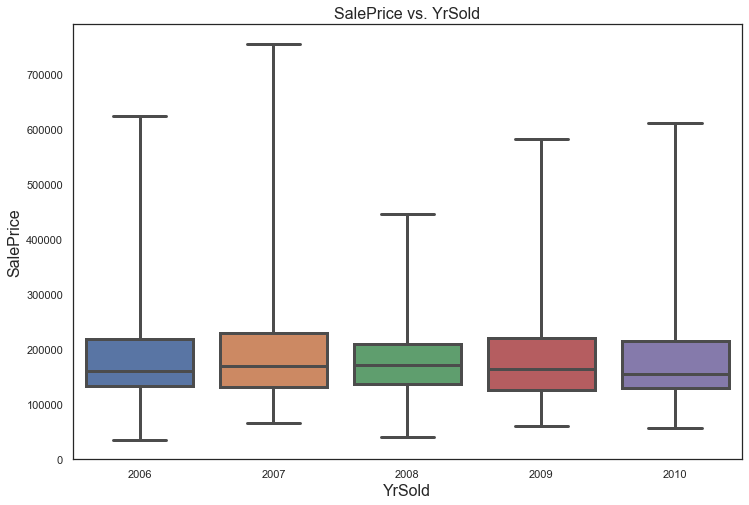

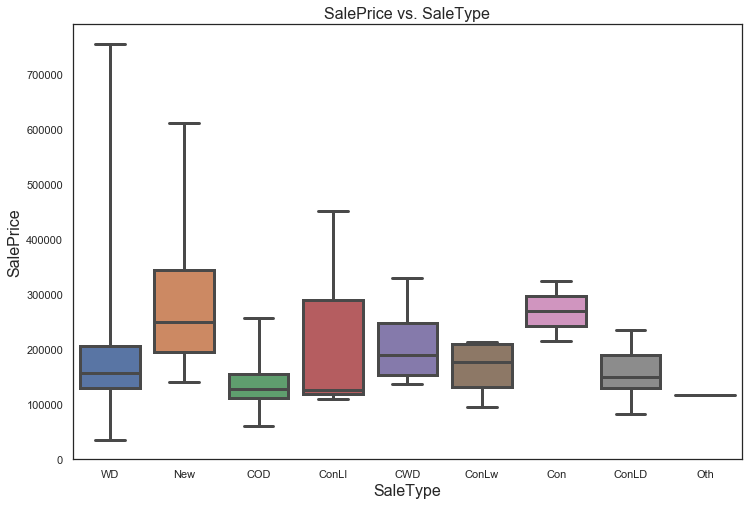

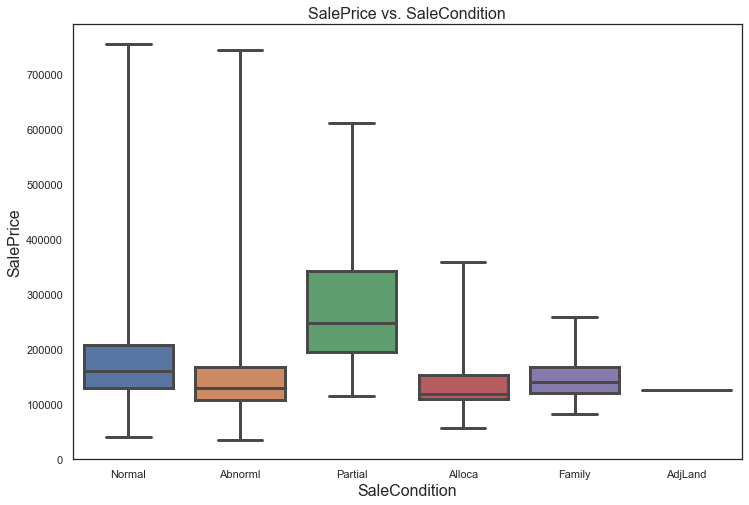

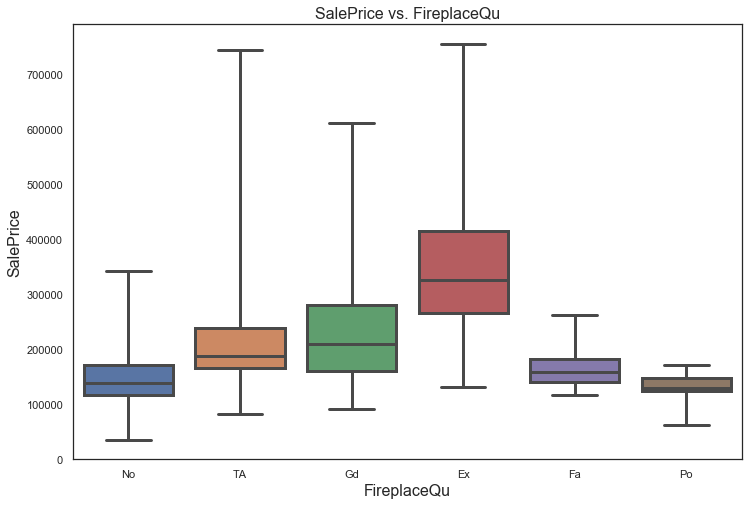

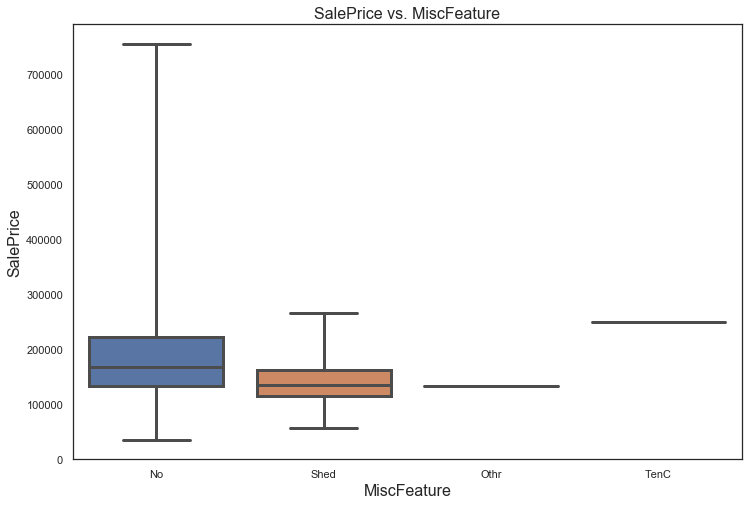

In [24]:
# CATEGORICAL COLUMNS: 
cat_col = ['Alley','MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
           'LandSlope','PoolQC','Fence','Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 
           'OverallQual', 'OverallCond','RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
           'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
           'BsmtFinType2', 'Heating','HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 
           'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'YrSold', 
           'SaleType', 'SaleCondition','FireplaceQu','MiscFeature']

               
#Box Plot
for col in cat_col:
    plt.subplots(figsize=(12,8), sharex=True)
    sns.boxplot(x=dfTrain[col], y=dfTrain['SalePrice'], whis="range", 
                color="y", linewidth=3, palette="deep")
    plt.xlabel(col, fontsize=16)
    plt.ylabel('SalePrice', fontsize=16)
    plt.title("SalePrice vs. " + col, fontsize=16)
    plt.show()

> # <font color=blue> 4. BiVariate Analysis </font>

In [25]:
#Check correlation relation between  variable
round(dfTrain.corr(),2)

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
MSSubClass              1.00        -0.39    -0.20         0.03        -0.09   
LotFrontage            -0.39         1.00     0.42         0.24        -0.05   
LotArea                -0.20         0.42     1.00         0.17        -0.03   
OverallQual             0.03         0.24     0.17         1.00        -0.16   
OverallCond            -0.09        -0.05    -0.03        -0.16         1.00   
YearBuilt               0.02         0.11     0.03         0.59        -0.43   
YearRemodAdd            0.01         0.09     0.03         0.57         0.04   
MasVnrArea              0.04         0.19     0.11         0.42        -0.17   
BsmtFinSF1             -0.07         0.24     0.23         0.25        -0.06   
BsmtFinSF2             -0.08         0.05     0.14        -0.07         0.04   
BsmtUnfSF              -0.15         0.12     0.01         0.32        -0.15   
TotalBsmtSF            -0.25         0.39     0.30         0.57        -0.19   
1stFlrSF               -0.25         0.45     0.33         0.52        -0.17   
2ndFlrSF                0.32         0.07     0.07         0.27         0.01   
LowQualFinSF            0.02         0.01     0.02        -0.01         0.05   
GrLivArea               0.08         0.40     0.31         0.61        -0.11   
BsmtFullBath           -0.01         0.12     0.18         0.13        -0.06   
BsmtHalfBath            0.01         0.00    -0.01        -0.05         0.12   
FullBath                0.13         0.19     0.13         0.58        -0.23   
HalfBath                0.21         0.04     0.04         0.25        -0.08   
BedroomAbvGr           -0.03         0.27     0.14         0.09         0.01   
KitchenAbvGr            0.27        -0.00    -0.02        -0.18        -0.09   
TotRmsAbvGrd            0.05         0.35     0.24         0.45        -0.10   
Fireplaces             -0.03         0.26     0.26         0.41        -0.02   
GarageYrBlt             0.05         0.07     0.01         0.56        -0.34   
GarageCars             -0.03         0.29     0.17         0.59        -0.27   
GarageArea             -0.09         0.36     0.21         0.55        -0.23   
WoodDeckSF             -0.02         0.08     0.13         0.28        -0.01   
OpenPorchSF             0.00         0.16     0.10         0.35        -0.08   
EnclosedPorch          -0.02         0.01    -0.02        -0.15         0.06   
3SsnPorch              -0.04         0.07     0.01         0.02        -0.01   
ScreenPorch            -0.02         0.04     0.07         0.05         0.09   
PoolArea                0.00         0.21     0.11         0.08        -0.02   
MiscVal                -0.04         0.00     0.01        -0.06         0.12   
MoSold                 -0.03         0.02     0.01         0.08        -0.02   
YrSold                 -0.01         0.01    -0.01        -0.01         0.04   
SalePrice              -0.09         0.35     0.30         0.80        -0.13   
DiffYearBuilt          -0.02        -0.11    -0.03        -0.59         0.43   
DiffYearRemodAdd       -0.01        -0.09    -0.03        -0.57        -0.04   
DiffGarageYrBlt        -0.05        -0.07    -0.01        -0.56         0.34   

                  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass             0.02          0.01        0.04       -0.07       -0.08   
LotFrontage            0.11          0.09        0.19        0.24        0.05   
LotArea                0.03          0.03        0.11        0.23        0.14   
OverallQual            0.59          0.57        0.42        0.25       -0.07   
OverallCond           -0.43          0.04       -0.17       -0.06        0.04   
YearBuilt              1.00          0.63        0.33        0.24       -0.06   
YearRemodAdd           0.63          1.00        0.19        0.12       -0.06   
MasVnrArea             0.33          0.19        1.00        0.28       -0.07   
BsmtFinS

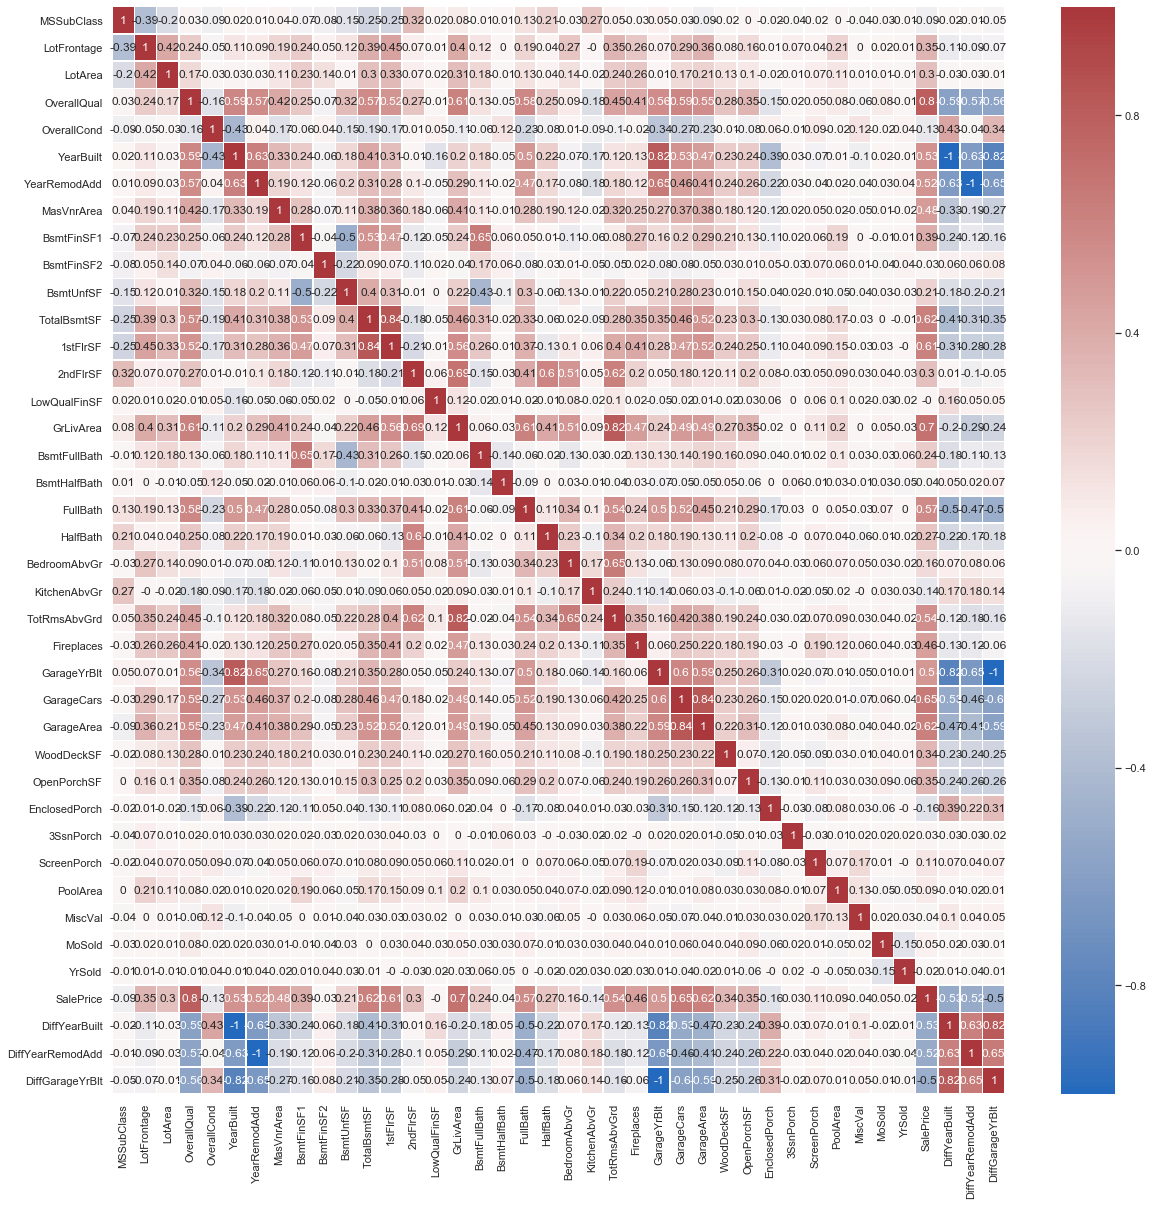

In [26]:
#creating heatmap
plt.subplots(figsize=(20,20))
sns.heatmap(round(dfTrain.corr(),2), cmap='vlag', annot=True, linewidths=.5)

> # <font color=blue> 5. Data Modeling </font>

> ## 5.1. Creating Dummy Variables

In [27]:
# Dumifying all columns using a loop
for col in cat_col:
    # Let's drop the first column from dummy df using 'drop_first = True' otherwise it will get multicollinear
    dummies = pd.get_dummies(dfTrain[col], drop_first = True)
    # Adding prefix to dummy column names so as to identify it later
    dummies = dummies.add_prefix(f'{col}_')
    # Add the results to the original housing dataframe
    dfTrain = pd.concat([dfTrain, dummies], axis = 1)
    # Drop original categorical column as we have created the dummies for it
    dfTrain.drop([col], axis = 1, inplace = True)

dfTrain.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0         65.0     8450       2003          2003       196.0         706   
1         80.0     9600       1976          1976         0.0         978   
2         68.0    11250       2001          2002       162.0         486   
3         60.0     9550       1915          1970         0.0         216   
4         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  SaleCondition_Normal  \
0           0        150          856       856  ...                     1   
1           0        284         1262      1262  ...                     1   
2           0        434          920       920  ...                     1   
3           0        540          756       961  ...                     0   
4           0        490         1145      1145  ...                     1   

   SaleCondition_Partial  FireplaceQu_Fa  FireplaceQu_Gd  FireplaceQu_No  \
0                      0               0               0               1   
1                      0               0               0               0   
2                      0               0               0               0   
3                      0               0               1               0   
4                      0               0               0               0   

   FireplaceQu_Po  FireplaceQu_TA  MiscFeature_Othr  MiscFeature_Shed  \
0               0               0                 0                 0   
1               0               1                 0                 0   
2               0               1                 0                 0   
3               0               0                 0                 0   
4               0               1                 0                 0   

   MiscFeature_TenC  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 289 columns]

> # <font color=blue> 6. Model Building </font>

> ## 6.1. Splitting Data into Training and Test Sets

In [28]:
#Preparing Test and Train Set

y = dfTrain['SalePrice'] 
X = dfTrain.drop(['SalePrice'],1)
X.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0         65.0     8450       2003          2003       196.0         706   
1         80.0     9600       1976          1976         0.0         978   
2         68.0    11250       2001          2002       162.0         486   
3         60.0     9550       1915          1970         0.0         216   
4         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  SaleCondition_Normal  \
0           0        150          856       856  ...                     1   
1           0        284         1262      1262  ...                     1   
2           0        434          920       920  ...                     1   
3           0        540          756       961  ...                     0   
4           0        490         1145      1145  ...                     1   

   SaleCondition_Partial  FireplaceQu_Fa  FireplaceQu_Gd  FireplaceQu_No  \
0                      0               0               0               1   
1                      0               0               0               0   
2                      0               0               0               0   
3                      0               0               1               0   
4                      0               0               0               0   

   FireplaceQu_Po  FireplaceQu_TA  MiscFeature_Othr  MiscFeature_Shed  \
0               0               0                 0                 0   
1               0               1                 0                 0   
2               0               1                 0                 0   
3               0               0                 0                 0   
4               0               1                 0                 0   

   MiscFeature_TenC  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 288 columns]

> ## 6.2. Scaling

In [29]:
#Scale
scaler = StandardScaler()
scaler.fit(X)


StandardScaler(copy=True, with_mean=True, with_std=True)

> ## 6.3. Split Train and Test

In [30]:
#Split 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

> ## 6.4. Perform Linear Regression

In [31]:
#Linear Regression
lm = LinearRegression()
lm.fit(X_train,y_train)

#predict train
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

#predict test
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9476995582399425
0.7187008694854443


> ## 6.5. Linear Regression model parameter

> ### Summary:
> - Simple Linear Regression gave us a complex model with most of the coefficients as non-zero values.
> - Simple Linear Regression has not helped us in the feature selection.

In [32]:
#Simple Linear Regression model parameter
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(-285503.064, 'Condition2_PosN'),
 (-273924.006, 'constant'),
 (74367.993, 'OverallQual_10'),
 (-71609.635, 'Foundation_Wood'),
 (-67288.358, 'GarageQual_Fa'),
 (-66400.162, 'GarageQual_Po'),
 (61808.278, 'GarageType_Basment'),
 (58964.164, 'PoolQC_Gd'),
 (-58710.733, 'Condition2_PosA'),
 (-54772.639, 'GarageQual_TA'),
 (-54615.782, 'OverallQual_5'),
 (53470.395, 'MSZoning_FV'),
 (-52877.898, 'OverallQual_4'),
 (-50929.357, 'OverallQual_3'),
 (50625.954, 'Neighborhood_StoneBr'),
 (-49397.32, 'OverallQual_6'),
 (46764.6, 'GarageType_CarPort'),
 (-43955.864, 'MiscFeature_TenC'),
 (-43285.711, 'OverallQual_7'),
 (43124.981, 'MSZoning_RH'),
 (42020.656, 'GarageType_Detchd'),
 (-41921.975, 'GarageQual_Gd'),
 (40002.101, 'PoolQC_Fa'),
 (39884.756, 'Foundation_Stone'),
 (38664.536, 'GarageType_Attchd'),
 (-38305.319, 'Heating_Grav'),
 (36878.071, 'GarageType_BuiltIn'),
 (35941.085, 'RoofMatl_Membran'),
 (-35534.865, 'Neighborhood_SWISU'),
 (35282.85, 'Street_Pave'),
 (-33847.983, 'RoofMatl_W

> ## 6.6. Performing Ridge Regression

In [33]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# set up cross validation scheme
folds = 5

model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)  

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [34]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.004705      0.001374         0.000970        0.000137      0.0001   
1       0.003653      0.000102         0.000873        0.000012       0.001   
2       0.004103      0.000483         0.001002        0.000115        0.01   
3       0.003826      0.000284         0.000930        0.000056        0.05   
4       0.003448      0.000126         0.000834        0.000018         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}      -21371.220173      -22583.956247      -26097.105726   
1   {'alpha': 0.001}      -21325.086606      -22537.378663      -26064.536180   
2    {'alpha': 0.01}      -20955.526500      -22161.950920      -25765.649443   
3    {'alpha': 0.05}      -20267.084607      -21250.347277      -24784.290015   
4     {'alpha': 0.1}      -19990.166349      -20576.815869      -24015.100790   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0      -22366.406868  ...    -22382.112589     2160.110755               27   
1      -22310.021222  ...    -22342.526880     2156.811553               26   
2      -21874.691980  ...    -22021.457270     2118.638440               24   
3      -21105.846181  ...    -21299.620547     1908.480743               23   
4      -20698.823017  ...    -20819.075604     1735.508865               22   

   split0_train_score  split1_train_score  split2_train_score  \
0       -10370.656223       -11565.689416        -9947.494420   
1       -10373.533657       -11566.748454        -9950.582599   
2       -10404.688341       -11580.264712        -9981.681850   
3       -10521.197693       -11643.875508       -10128.153887   
4       -10625.364090       -11710.985667       -10295.842135   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0       -10957.903080       -11572.863389     -10882.921306       645.794644  
1       -10960.203634       -11573.370674     -10884.887804       644.829336  
2       -10982.286107       -11579.083010     -10905.600804       635.479321  
3       -11074.444504       -11621.369426     -10997.808204       599.259692  
4       -11176.801616       -11689.311195     -11099.660940       565.409268  

[5 rows x 21 columns]

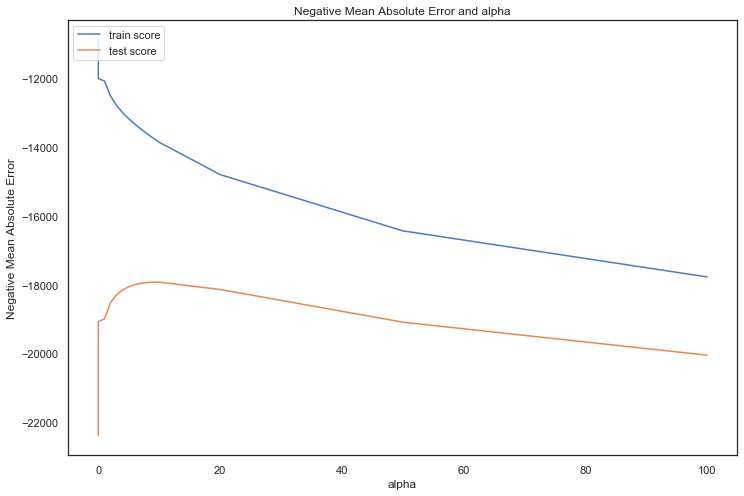

In [35]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(12,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


In [36]:
alpha = 5
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

# predict
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_ridge = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

0.9289945477845447
0.7796492311989303


> ### Summary:
> - Ridge regression gave us a complex model with most of the coefficients as non-zero values.
> - Ridge regression has not helped us in the feature selection.

In [37]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(-369891.341, 'constant'),
 (-41352.339, 'Condition2_PosN'),
 (39572.675, 'Neighborhood_StoneBr'),
 (32496.413, 'OverallQual_10'),
 (28293.044, 'OverallQual_9'),
 (21443.928, 'Neighborhood_NridgHt'),
 (-20728.319, 'OverallCond_3'),
 (19301.882, 'LotConfig_CulDSac'),
 (18708.303, 'Condition2_Norm'),
 (-18324.678, 'Neighborhood_Edwards'),
 (17829.623, 'Neighborhood_NoRidge'),
 (-16758.784, 'OverallQual_5'),
 (16334.374, 'LandContour_HLS'),
 (-15817.525, 'OverallQual_4'),
 (-14853.154, 'KitchenQual_TA'),
 (-14529.791, 'Condition1_PosN'),
 (-14273.623, 'OverallQual_6'),
 (13939.974, 'BsmtExposure_Gd'),
 (13788.352, 'OverallCond_9'),
 (13604.604, 'Exterior1st_BrkFace'),
 (-13356.979, 'KitchenQual_Gd'),
 (-13246.647, 'BldgType_Twnhs'),
 (13095.184, 'LandContour_Lvl'),
 (12908.519, 'MSZoning_FV'),
 (-12831.035, 'Neighborhood_SWISU'),
 (-12773.062, 'KitchenAbvGr'),
 (-12448.885, 'BsmtQual_Gd'),
 (12374.762, 'Street_Pave'),
 (-12350.173, 'KitchenQual_Fa'),
 (-12070.511, 'Neighborhood_NAmes'),


> ## 6.7. Performing Lasso Regression

In [38]:
# lasso regression
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))


0.9476949823170664
0.7135963508129888


In [39]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))


[('constant', -995036.82),
 ('LotFrontage', 22.51),
 ('LotArea', 0.831),
 ('YearBuilt', 591.034),
 ('YearRemodAdd', 211.585),
 ('MasVnrArea', 12.583),
 ('BsmtFinSF1', 27.538),
 ('BsmtFinSF2', 25.957),
 ('BsmtUnfSF', 14.309),
 ('TotalBsmtSF', 10.743),
 ('1stFlrSF', 26.99),
 ('2ndFlrSF', 50.273),
 ('LowQualFinSF', 6.154),
 ('GrLivArea', 6.859),
 ('BsmtFullBath', 5505.525),
 ('BsmtHalfBath', 55.866),
 ('FullBath', 7770.845),
 ('HalfBath', 1935.299),
 ('BedroomAbvGr', -1209.589),
 ('KitchenAbvGr', 3014.456),
 ('TotRmsAbvGrd', -466.254),
 ('Fireplaces', 7264.459),
 ('GarageYrBlt', -326.986),
 ('GarageCars', 4914.871),
 ('GarageArea', 19.506),
 ('WoodDeckSF', 11.447),
 ('OpenPorchSF', -9.99),
 ('EnclosedPorch', 14.222),
 ('3SsnPorch', 25.084),
 ('ScreenPorch', 48.092),
 ('PoolArea', 31.856),
 ('MiscVal', 0.973),
 ('DiffYearBuilt', 347.973),
 ('DiffYearRemodAdd', 149.086),
 ('DiffGarageYrBlt', -281.978),
 ('Alley_No', 1313.244),
 ('Alley_Pave', -5836.63),
 ('MSSubClass_30', 1179.615),
 ('MSSu

In [40]:
# grid search CV


# specify range of hyperparameters
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

# grid search
# lasso model
model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    2.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [41]:
#Cross Validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.090244      0.002879         0.001133        0.000083       0.001   
1       0.090299      0.004432         0.001087        0.000035        0.01   
2       0.090179      0.007724         0.001181        0.000142           1   
3       0.092126      0.001594         0.001316        0.000170           5   
4       0.087256      0.003099         0.001154        0.000128          10   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}           0.672156           0.819653           0.655885   
1   {'alpha': 0.01}           0.672415           0.821863           0.655948   
2    {'alpha': 1.0}           0.679939           0.833315           0.666674   
3    {'alpha': 5.0}           0.690468           0.862621           0.692624   
4   {'alpha': 10.0}           0.691413           0.883387           0.709614   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.875261  ...         0.779910        0.097213                5   
1           0.875294  ...         0.780410        0.097316                4   
2           0.879156  ...         0.787425        0.094958                3   
3           0.888321  ...         0.803847        0.092333                2   
4           0.892839  ...         0.813189        0.092424                1   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.964430            0.951985            0.965715   
1            0.964429            0.951985            0.965715   
2            0.964330            0.951902            0.965650   
3            0.963382            0.951027            0.964794   
4            0.961993            0.949633            0.963366   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.951287            0.949931          0.956670         0.006904  
1            0.951287            0.949931          0.956669         0.006904  
2            0.951183            0.949865          0.956586         0.006906  
3            0.950376            0.949260          0.955768         0.006831  
4            0.949149            0.948255          0.954479         0.006724  

[5 rows x 21 columns]

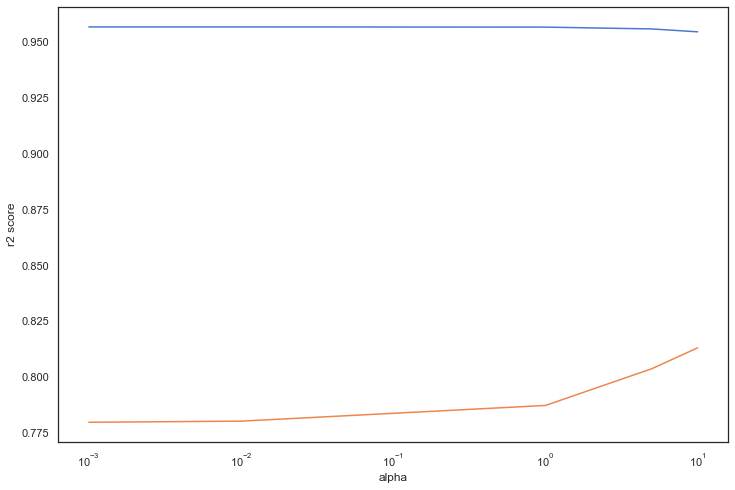

In [42]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.figure(figsize=(12,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

In [43]:
# model with optimal alpha
# lasso regression
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9476949823170664
0.7135963508129888


In [44]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
lasso_selected_features = []
for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[1:31]:
    lasso_selected_features.append(v)
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(-995036.82, 'constant'),
 (-286384.689, 'Condition2_PosN'),
 (-102626.112, 'Heating_Grav'),
 (-91937.432, 'Electrical_FuseP'),
 (78007.347, 'OverallQual_10'),
 (-71335.108, 'Foundation_Wood'),
 (-68198.714, 'GarageQual_Fa'),
 (59697.105, 'GarageType_Basment'),
 (-59439.668, 'Condition2_PosA'),
 (55813.649, 'PoolQC_Gd'),
 (-55587.262, 'GarageQual_TA'),
 (51777.748, 'MSZoning_FV'),
 (-50937.036, 'OverallQual_5'),
 (50651.709, 'Neighborhood_StoneBr'),
 (-49410.497, 'OverallQual_4'),
 (-47331.873, 'OverallQual_3'),
 (-45734.593, 'OverallQual_6'),
 (44198.876, 'GarageType_CarPort'),
 (43059.595, 'PoolQC_No'),
 (-42617.003, 'GarageQual_Gd'),
 (40941.758, 'MSZoning_RH'),
 (-40499.472, 'MiscFeature_TenC'),
 (-40351.563, 'MSSubClass_90'),
 (40058.117, 'GarageType_Detchd'),
 (-39640.682, 'OverallQual_7'),
 (39427.654, 'Foundation_Stone'),
 (38223.185, 'RoofMatl_Membran'),
 (37059.145, 'Street_Pave'),
 (36705.368, 'GarageType_Attchd'),
 (-35038.511, 'Neighborhood_SWISU'),
 (34906.827, 'GarageTy

# Summary:
> - Lasso Regression gave us a simpler model with most of the coefficients as zero values.
> - Lasso Regression has helped us in the feature selection.


# Concusion:

In [45]:
print("Since the model accuracy on test and train set for all three models above are similar, we would chose the simpler model.")
print("Simple Linear Regression model is fairly complex, hence we would not consider that.")
print("Ridge Regression model is fairly complex, hence we would not consider that.")
print("Optimum value of lambda for Ridge Regression is 4")
print("Lasso Regression model is simpler, hence we would consider that, since most co-efficients are zero.")
print("Optimum value of lambda for Lasso Regression is 50")
print("Most important 30 features that are affecting Sales pricing are:")
for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[1:31]:
    print(f'{v:40}Score: {k}')

Since the model accuracy on test and train set for all three models above are similar, we would chose the simpler model.
Simple Linear Regression model is fairly complex, hence we would not consider that.
Ridge Regression model is fairly complex, hence we would not consider that.
Optimum value of lambda for Ridge Regression is 4
Lasso Regression model is simpler, hence we would consider that, since most co-efficients are zero.
Optimum value of lambda for Lasso Regression is 50
Most important 30 features that are affecting Sales pricing are:
Condition2_PosN                         Score: -286384.689
Heating_Grav                            Score: -102626.112
Electrical_FuseP                        Score: -91937.432
OverallQual_10                          Score: 78007.347
Foundation_Wood                         Score: -71335.108
GarageQual_Fa                           Score: -68198.714
GarageType_Basment                      Score: 59697.105
Condition2_PosA                         Score: 

> ## From our initial set of columns, few of the major influencers for Sales Pricing are:
> - Condition2
> - Electrical
> - Foundation
> - GarageQual
> - GarageType
> - Heating
> - MiscFeature
> - MSSubClass
> - MSZoning
> - Neighbourhood
> - OverallQual
> - PoolQC
> - RoofMatl
> - Street